# Data Projekt 2 Team_xmisti00


This program is specified for data analyzation and preparation for mining algorithms. It is used for data cleaning, data transformation, data reduction and data visualization. Dataset IT Salary Survey EU  2020.csv is analyzed and its analyzed outputs are in ./img as *.pdf outputs, and in ./analyzedData as *.csv outputs.
After analyzation, 2 versions of data set are created, both is for data mining algorithms of salary prediction. One is composed only of numerical values, the other is composed only of categorical values.
Final output is in ./predicitonData as numericalDataSet.csv and CategoricalDataSet.csv. 

In [132]:
__authors__ = "Matej Mištík, Ľuboš Bever, Jakub Richtarik"
__version__ = "1.0"
__maintainer__ = "Matej Mištík"
__email__ = "xmisti00@stud.vutbr.cz"

# Load and Show data set

In [133]:
# Path: main.ipynb
# coding=utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy import stats
from pathlib import Path

pd.set_option('display.max_columns', None)

df = pd.read_csv('./dataSets/IT Salary Survey EU  2020.csv')

In [134]:
for column in df.columns:
    print(column)

Timestamp
Age
Gender
City
Position 
Total years of experience
Years of experience in Germany
Seniority level
Your main technology / programming language
Other technologies/programming languages you use often
Yearly brutto salary (without bonus and stocks) in EUR
Yearly bonus + stocks in EUR
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country
Annual bonus+stocks one year ago. Only answer if staying in same country
Number of vacation days
Employment status
Сontract duration
Main language at work
Company size
Company type
Have you lost your job due to the coronavirus outbreak?
Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week
Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR


In [135]:
df.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR':'Salary',
'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'SalaryYearAgo',
'Number of vacation days':'VacationDays',
'Company size':'CompanySize',
'Company type':'CompanyType',
'Seniority level':'SeniorityLevel',
'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'ShortWeekHours',
'Total years of experience' : 'ExpierenceYears',
'Years of experience in Germany' : 'ExpierenceYearsGermany',
'Have you lost your job due to the coronavirus outbreak?' : 'LostJobDueToCorona',
'Position ' : 'Position', 'Annual bonus+stocks one year ago. Only answer if staying in same country' : 'StocksYearAgoSameCountry',
'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR' : 'CovidSupport'}, inplace=True)

In [136]:
for column in df.columns:
    print(column)

Timestamp
Age
Gender
City
Position
ExpierenceYears
ExpierenceYearsGermany
SeniorityLevel
Your main technology / programming language
Other technologies/programming languages you use often
Salary
Yearly bonus + stocks in EUR
SalaryYearAgo
StocksYearAgoSameCountry
VacationDays
Employment status
Сontract duration
Main language at work
CompanySize
CompanyType
LostJobDueToCorona
ShortWeekHours
CovidSupport


In [137]:
df

,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


# Data Exploration

## prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

In [138]:
#Size of row x columns
df.shape

(1253, 23)

In [139]:
# datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1253 non-null   object 
 1   Age                                                     1226 non-null   float64
 2   Gender                                                  1243 non-null   object 
 3   City                                                    1253 non-null   object 
 4   Position                                                1247 non-null   object 
 5   ExpierenceYears                                         1237 non-null   object 
 6   ExpierenceYearsGermany                                  1221 non-null   object 
 7   SeniorityLevel                                          1241 non-null   object 
 8   Your main technology / programming lan

- Timestamp                                                                                                                -   Intervalový
- Age                                                                                                                      -   Pomerový
- Gender                                                                                                                   -   Symetrický binárny
- City                                                                                                                     -   Nominálny
- Position                                                                                                                 -   Ordinálny
- Total years of experience                                                                                                -   Pomerový
- Years of experience in Germany                                                                                           -   Pomerový
- Seniority level                                                                                                          -   Ordinálny
- Your main technology / programming language                                                                              -   Nominálny
- Other technologies/programming languages you use often                                                                   -   Nominálny
- Yearly brutto salary (without bonus and stocks) in EUR                                                                   -   Pomerový
- Yearly bonus + stocks in EUR                                                                                             -   Pomerový
- Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country                 -   Pomerový
- Annual bonus+stocks one year ago. Only answer if staying in same country                                                 -   Pomerový
- Number of vacation days                                                                                                  -   Pomerový
- Employment status                                                                                                        -   Nominálny
- Contract duration                                                                                                        -   Pomerový
- Main language at work                                                                                                    -   Nominálny
- Company size                                                                                                             -   Ordinálny
- Company type                                                                                                             -   Ordinálny
- Have you lost your job due to the coronavirus outbreak?                                                                  -   Nominálny
- Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week (ShortWeek)            -   Pomerový
- Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR  -   Pomerový

In [140]:
# find range of all columns for dataframe and create a output file for df.describe
df.describe()

,Age,Salary,SalaryYearAgo,ShortWeekHours
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [141]:
# show mode for all numerical columns
df.mode(numeric_only=True)

,Age,Salary,SalaryYearAgo,ShortWeekHours
0,30.0,60000.0,65000.0,0.0


In [142]:
df.describe(exclude='number')

,Timestamp,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Yearly bonus + stocks in EUR,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,CovidSupport
count,1253,1243,1253,1247,1237,1221,1241,1126,1096,829,614,1185,1236,1224,1237,1235,1228,1233,462
unique,1248,3,119,148,48,53,24,256,562,168,131,45,11,3,14,5,63,10,59
top,24/11/2020 13:55:19,Male,Berlin,Software Engineer,10,2,Senior,Java,Javascript / Typescript,0,0,30,Full-time employee,Unlimited contract,English,1000+,Product,No,0
freq,2,1049,681,387,138,195,565,184,44,227,200,488,1190,1159,1020,448,760,1162,161


In [143]:
# geometric mean of some numerical columns
dfGeo = df.copy()
dfGeo.dropna(axis=0, inplace=True)
geometric_mean = stats.gmean(dfGeo.loc[:,('SalaryYearAgo')]).round(2)
print('geometric mean of Salary year ago:',geometric_mean)
geometric_mean = stats.gmean(dfGeo.loc[:,('Age')], axis=0).round(2)
print('geometric mean of Age:', geometric_mean)

geometric mean of Salary year ago: 63817.0
geometric mean of Age: 32.81


In [144]:
# harmonic mean of some numerical columns
harmonic_mean = stats.hmean(dfGeo.loc[:,('SalaryYearAgo')]).round(2)
print('harmonic mean of Salary year ago:',harmonic_mean)
harmonic_mean = stats.hmean(dfGeo.loc[:,('Age')], axis=0).round(2)
print('harmonic mean of Age:',harmonic_mean)

harmonic mean of Salary year ago: 59905.52
harmonic mean of Age: 32.45


In [145]:
# dataframe std
print('Standard deviation of SalaryYearAgo of numerical columns:')
df.std(numeric_only=True, axis=0, ddof=0)

Standard deviation of SalaryYearAgo of numerical columns:


Age               5.661494e+00
Salary            2.823934e+09
SalaryYearAgo     1.679558e+07
ShortWeekHours    1.525468e+01
dtype: float64

In [146]:
# count values in all columns and show ten most used values descending
for col in df.columns:
    print(col)
    print(df[col].value_counts().any() and df[col].value_counts().head(10))
    print('--------------------------------------')

Timestamp
24/11/2020 13:55:19    2
25/11/2020 08:47:37    2
24/11/2020 15:07:35    2
25/11/2020 18:28:01    2
24/11/2020 14:07:23    2
24/11/2020 11:14:15    1
27/11/2020 12:56:27    1
27/11/2020 13:31:20    1
27/11/2020 13:24:29    1
27/11/2020 13:21:26    1
Name: Timestamp, dtype: int64
--------------------------------------
Age
30.0    110
33.0     94
32.0     94
28.0     87
31.0     87
29.0     86
35.0     82
34.0     74
36.0     60
26.0     59
Name: Age, dtype: int64
--------------------------------------
Gender
Male       1049
Female      192
Diverse       2
Name: Gender, dtype: int64
--------------------------------------
City
Berlin        681
Munich        236
Frankfurt      44
Hamburg        40
Stuttgart      26
Cologne        20
Amsterdam       9
Stuttgart       7
Prague          6
Karlsruhe       6
Name: City, dtype: int64
--------------------------------------
Position
Software Engineer     387
Backend Developer     174
Data Scientist        110
Frontend Developer     89
Q

## prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.).



### Age

count    1226.000000
mean       32.509788
std         5.663804
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64


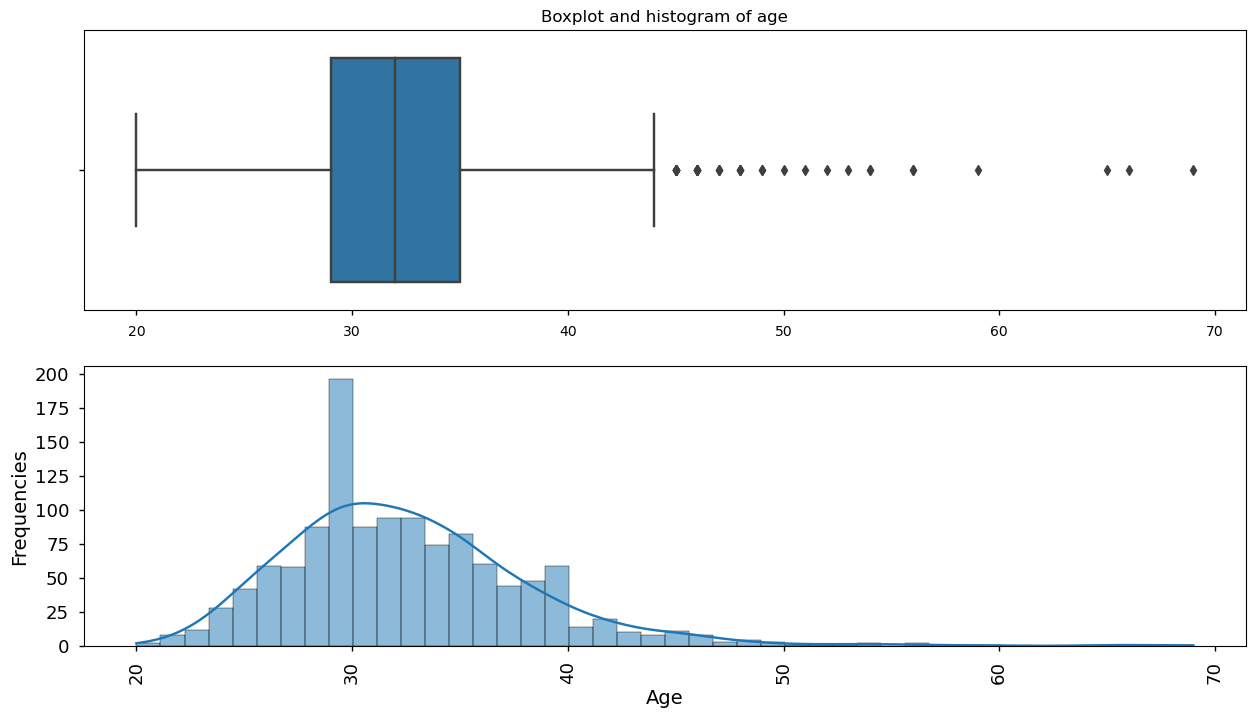

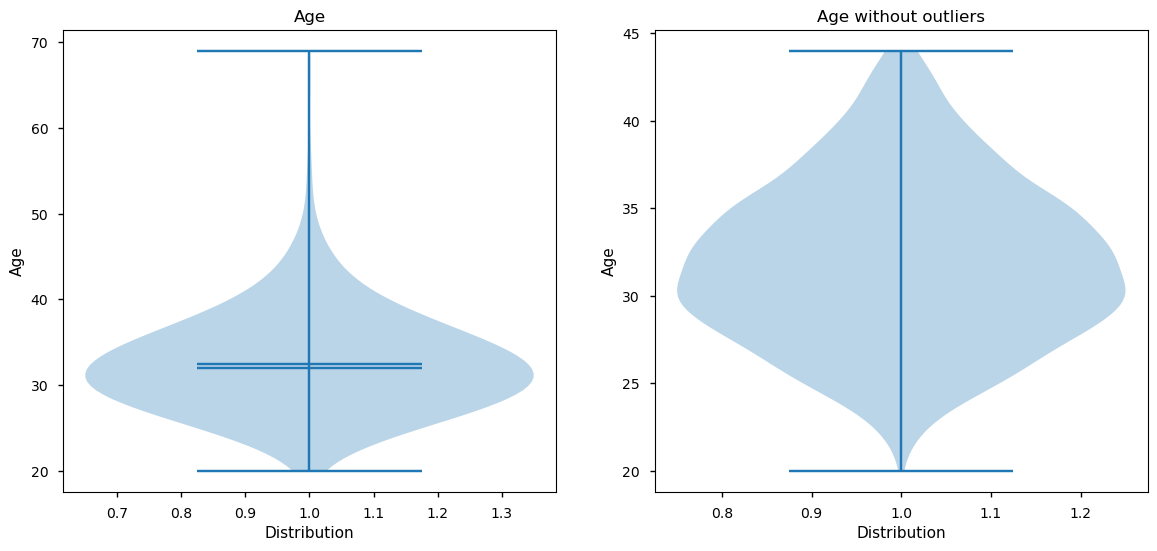

count    1186.000000
mean       31.937605
std         4.676666
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        44.000000
Name: Age, dtype: float64


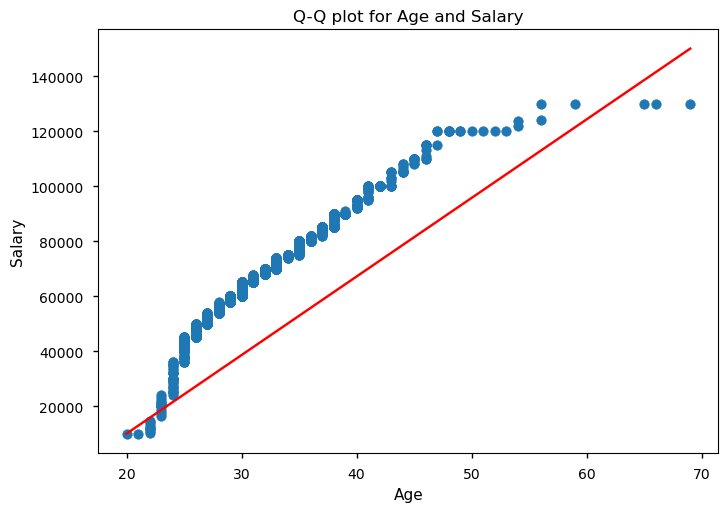

In [147]:
age = df['Age'].dropna()
Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)
IQR = Q3 - Q1

ageOUT = age[~((age < (Q1 - 1.5 * IQR)) |(age > (Q3 + 1.5 * IQR)))]

fig, (ax_box,ax_hist) = plt.subplots(2,figsize=(15,8))

sns.boxplot(data=age,x=age,ax=ax_box)
ax_box.set(xlabel="")
ax_box.set_title('Boxplot and histogram of age')
sns.histplot(data=age,x=age,kde=True,ax=ax_hist)


plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequencies",fontsize=14)
print(age.describe())
# create subplots for age and ageOUT

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

ax1.violinplot(age, showmeans=True, showmedians=True, showextrema=True, bw_method=0.5, points=100, widths=0.7)
ax1.set_title('Age')
ax1.set_ylabel('Age')
ax1.set_xlabel('Distribution')

ax2.violinplot(ageOUT)
ax2.set_title('Age without outliers')
ax2.set_ylabel('Age')
ax2.set_xlabel('Distribution')

plt.show()
plt.close()

print(ageOUT.describe())

# create Q-Q plot for age and salary

plt.scatter(np.sort(df['Age']), np.sort(df['Salary']))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Q-Q plot for Age and Salary')
# add the line y=x
x = np.array([df['Age'].min(), df['Age'].max()])
y = np.array([df['Salary'].min(),150000])
plt.plot(x, y, color='red')
plt.savefig(Path('./img/age_salary_qq_plot.pdf'))


### Vacation Days

count    1185.000000
mean       28.037131
std        11.100674
min         0.000000
25%        27.000000
50%        28.000000
75%        30.000000
max       365.000000
Name: VacationDays, dtype: float64


count    1100.000000
mean       28.247273
std         2.045155
min        23.000000
25%        27.000000
50%        28.000000
75%        30.000000
max        34.000000
Name: VacationDays, dtype: float64

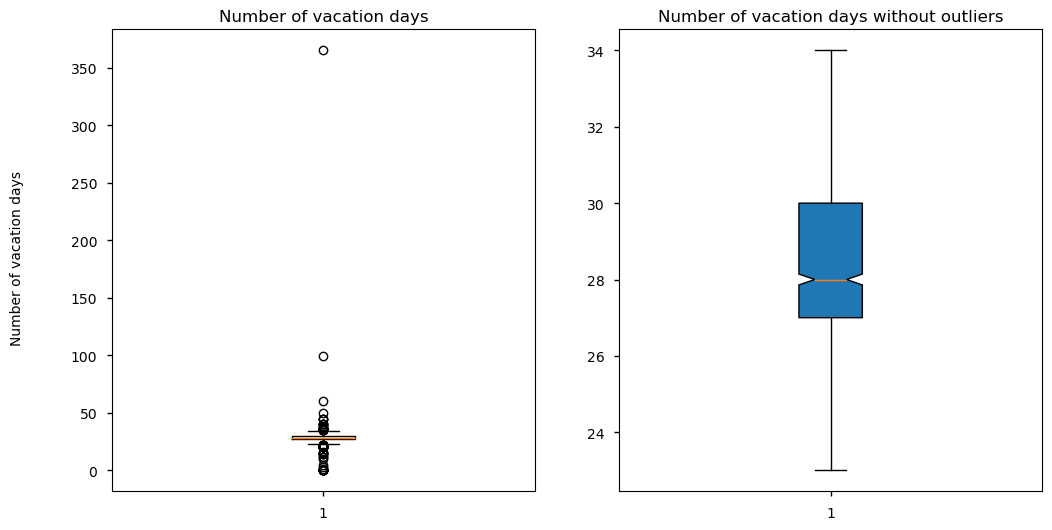

In [148]:
# create violin graph for number of vacation days / must be changed to numeric

numberOfDays = df['VacationDays'].dropna()
numberOfDays = pd.to_numeric(numberOfDays.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

Q1 = numberOfDays.quantile(0.25)
Q3 = numberOfDays.quantile(0.75)
IQR = Q3 - Q1

numberOfDaysOUT = numberOfDays[~((numberOfDays < (Q1 - 1.5 * IQR)) |(numberOfDays > (Q3 + 1.5 * IQR)))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.text(0.04, 0.5, 'Number of vacation days', va='center', rotation='vertical')

ax1.boxplot(numberOfDays)  # will be used to label x-ticks
ax1.set_title('Number of vacation days')
ax2.boxplot(numberOfDaysOUT,notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax2.set_title('Number of vacation days without outliers')

print(numberOfDays.describe())
numberOfDaysOUT.describe()

### ExpierenceYears

<AxesSubplot:title={'center':'Years of experience'}>

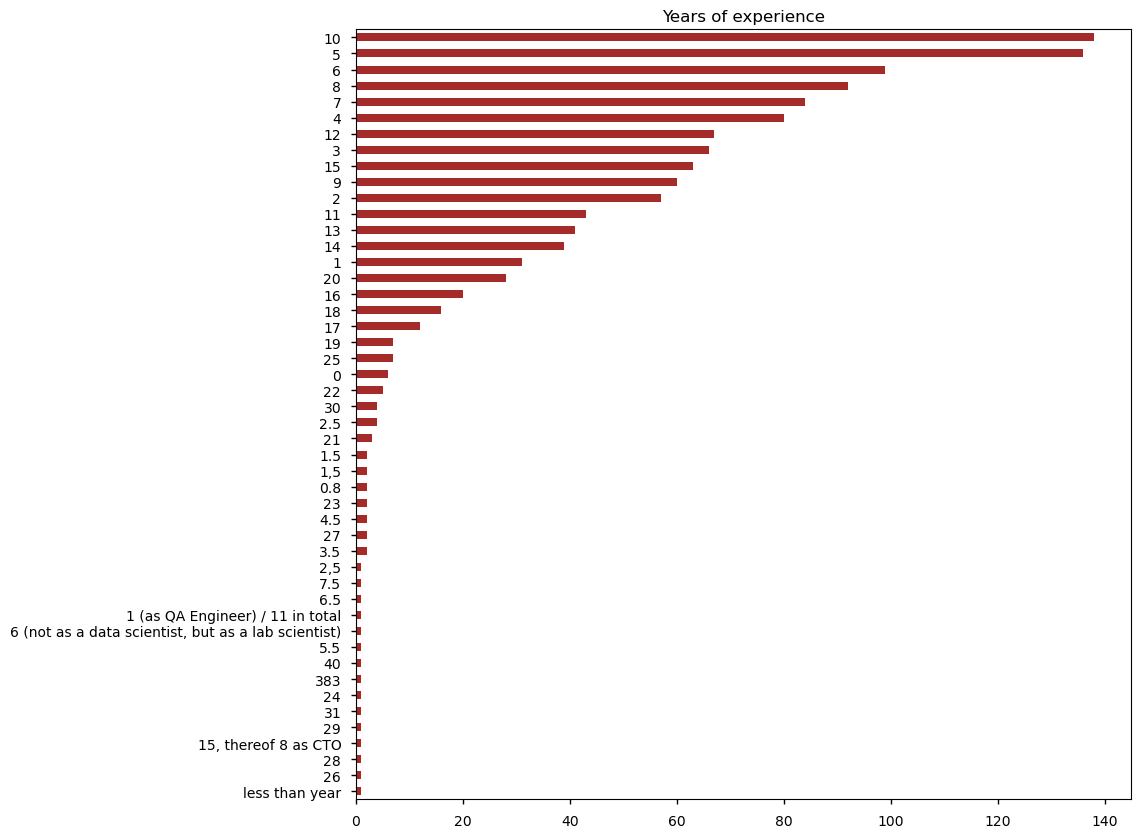

In [149]:
ExpierenceYearsCounts = df['ExpierenceYears'].dropna()
# sort values in ascending order
ExpierenceYearsCounts = ExpierenceYearsCounts.sort_values(ascending=True)
ExpierenceYearsCounts = ExpierenceYearsCounts.value_counts(sort=True, ascending=True)
ExpierenceYearsCounts.plot(kind='barh', figsize=(10, 10), title='Years of experience', color='brown')

<AxesSubplot:title={'center':'Years of experience without outliers'}>

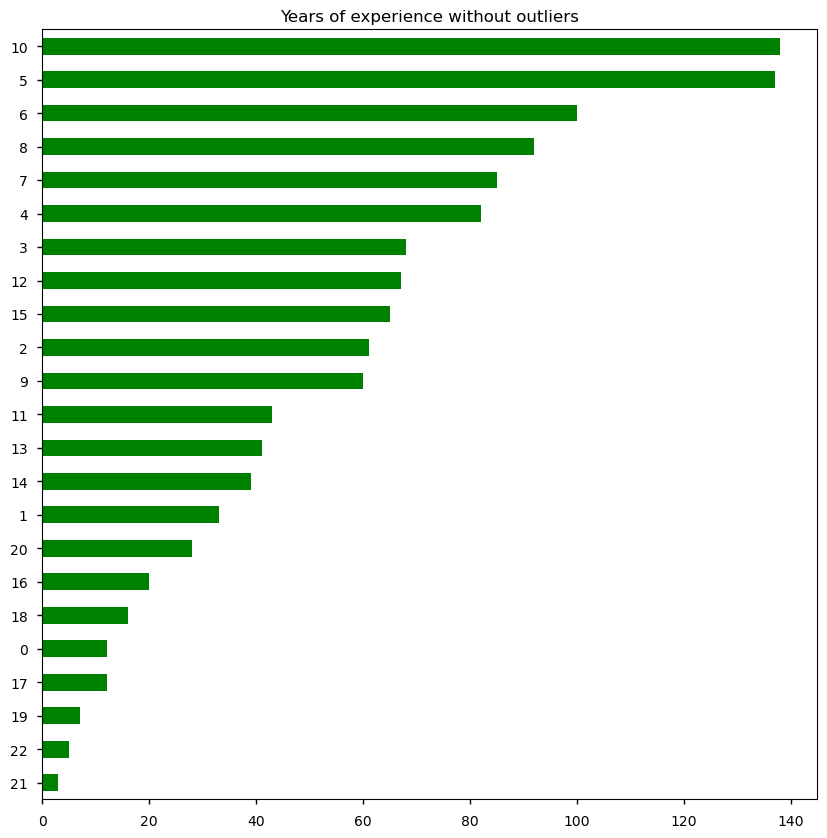

In [150]:
ExpierenceYearsCounts = df['ExpierenceYears'].dropna()
ExpierenceYearsCounts = pd.to_numeric(ExpierenceYearsCounts.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

# IQR 
Q1 = ExpierenceYearsCounts.quantile(0.25)
Q3 = ExpierenceYearsCounts.quantile(0.75)
IQR = Q3 - Q1

ExpierenceYearsCounts = ExpierenceYearsCounts[~((ExpierenceYearsCounts < (Q1 - 1.5 * IQR)) |(ExpierenceYearsCounts > (Q3 + 1.5 * IQR)))]
ExpierenceYearsCounts = ExpierenceYearsCounts.sort_values(ascending=True)
ExpierenceYearsCounts = ExpierenceYearsCounts.value_counts(sort=True, ascending=True)
ExpierenceYearsCounts.plot(kind='barh', figsize=(10, 10), title='Years of experience without outliers', color='green')

count    1237.000000
mean        9.064673
std        11.893229
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max       383.000000
Name: ExpierenceYears, dtype: float64


count    1214.000000
mean        8.428336
std         4.717167
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        22.000000
Name: ExpierenceYears, dtype: float64

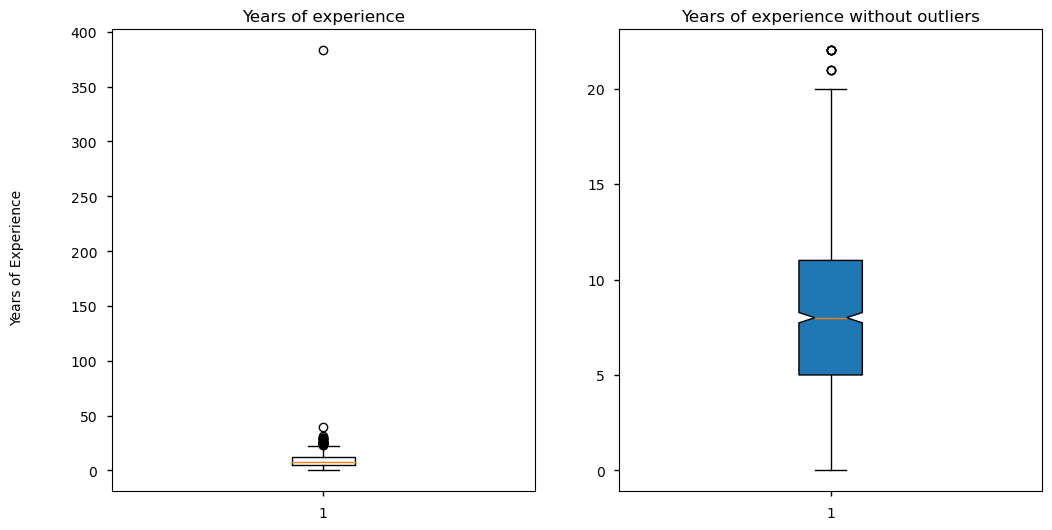

In [151]:
# create boxplot for years of experience

Expierence = df['ExpierenceYears'].dropna()
Expierence = pd.to_numeric(Expierence.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

Q1 = Expierence.quantile(0.25)
Q3 = Expierence.quantile(0.75)
IQR = Q3 - Q1

ExpierenceOUT = Expierence[~((Expierence < (Q1 - 1.5 * IQR)) |(Expierence > (Q3 + 1.5 * IQR)))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.text(0.04, 0.5, 'Years of Experience', va='center', rotation='vertical')

ax1.boxplot(Expierence)
ax1.set_title('Years of experience')
ax2.boxplot(ExpierenceOUT,notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax2.set_title('Years of experience without outliers')

print(Expierence.describe())
ExpierenceOUT.describe()

### ExpierenceYearsGermany

<AxesSubplot:title={'center':'Years of experience in Germany'}>

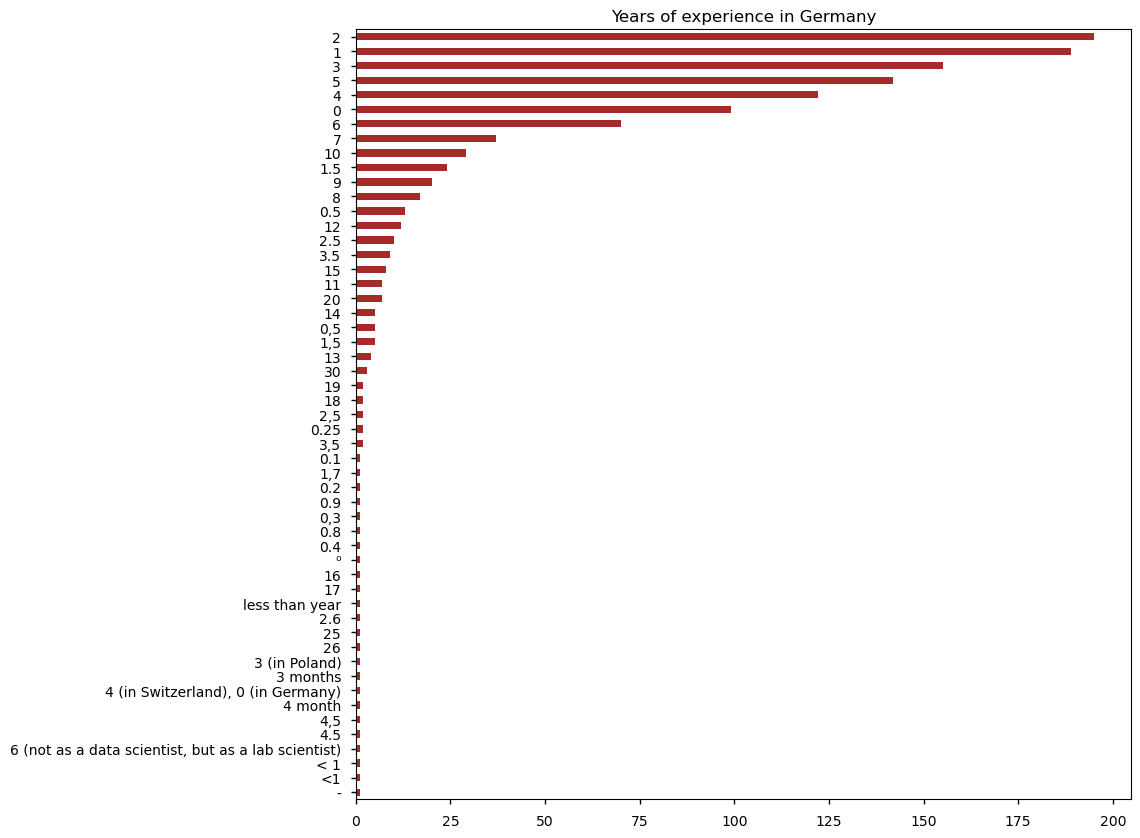

In [152]:
ExpierenceYearsinGermany = df['ExpierenceYearsGermany'].dropna()

ExpierenceYearsinGermany = df['ExpierenceYearsGermany'].dropna()
# sort values in ascending order
ExpierenceYearsinGermany = ExpierenceYearsinGermany.sort_values(ascending=True)
ExpierenceYearsinGermany = ExpierenceYearsinGermany.value_counts(sort=True, ascending=True)
ExpierenceYearsinGermany.plot(kind='barh', figsize=(10, 10), title='Years of experience in Germany', color='brown')

<AxesSubplot:title={'center':'Years of experience in Germany without outliers'}>

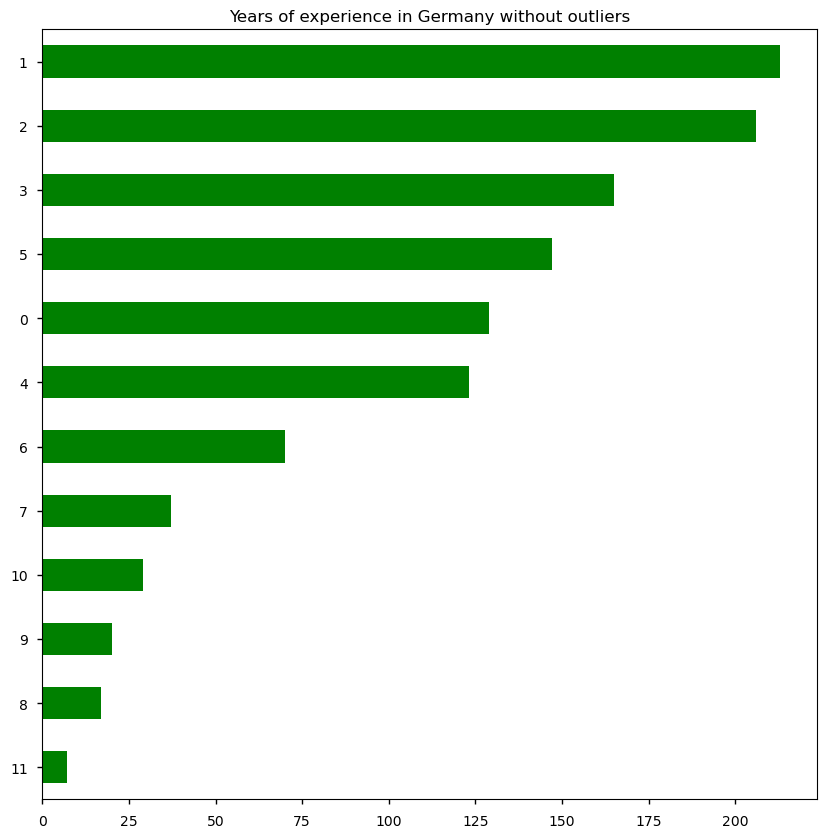

In [153]:
ExpierenceYearsinGermany = df['ExpierenceYearsGermany'].dropna()
ExpierenceYearsinGermany = pd.to_numeric(ExpierenceYearsinGermany.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

# IQR
Q1 = ExpierenceYearsinGermany.quantile(0.25)
Q3 = ExpierenceYearsinGermany.quantile(0.75)
IQR = Q3 - Q1

ExpierenceYearsinCountsGermanyOUT = ExpierenceYearsinGermany[~((ExpierenceYearsinGermany < (Q1 - 1.5 * IQR)) |(ExpierenceYearsinGermany > (Q3 + 1.5 * IQR)))]
ExpierenceYearsinCountsGermanyOUT = ExpierenceYearsinCountsGermanyOUT.sort_values(ascending=True)
ExpierenceYearsinCountsGermanyOUT = ExpierenceYearsinCountsGermanyOUT.value_counts(sort=True, ascending=True)
ExpierenceYearsinCountsGermanyOUT.plot(kind='barh', figsize=(10, 10), title='Years of experience in Germany without outliers', color='green')

count    1221.000000
mean        3.882064
std         4.206846
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        45.000000
Name: ExpierenceYearsGermany, dtype: float64


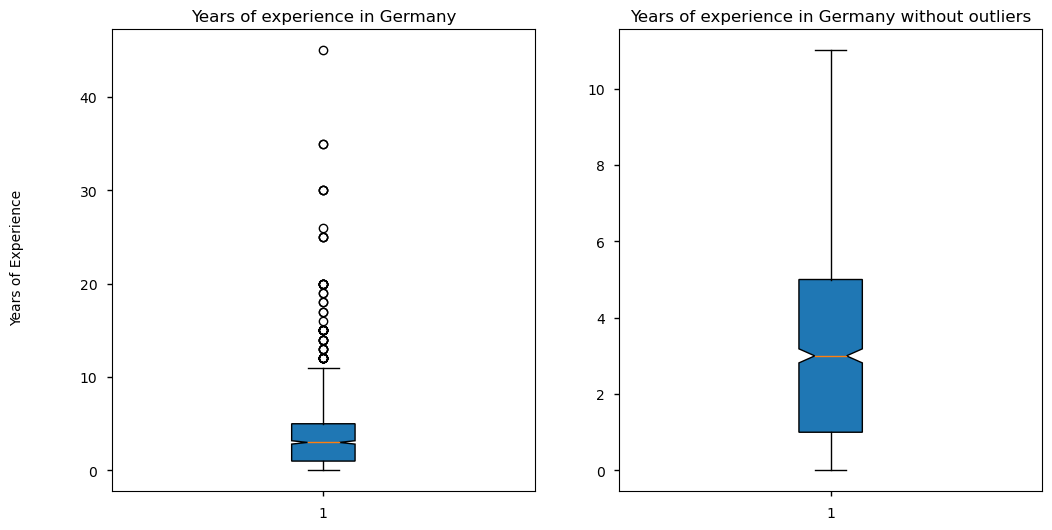

In [154]:
# create boxplot for years of experience

ExpierenceYearsinGermany = df['ExpierenceYearsGermany'].dropna()
ExpierenceYearsinGermany = pd.to_numeric(ExpierenceYearsinGermany.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

Q1 = ExpierenceYearsinGermany.quantile(0.25)
Q3 = ExpierenceYearsinGermany.quantile(0.75)
IQR = Q3 - Q1

ExpierenceYearsinGermanyOUT = ExpierenceYearsinGermany[~((ExpierenceYearsinGermany < (Q1 - 1.5 * IQR)) |(ExpierenceYearsinGermany > (Q3 + 1.5 * IQR)))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.text(0.04, 0.5, 'Years of Experience', va='center', rotation='vertical')

ax1.boxplot(ExpierenceYearsinGermany,notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax1.set_title('Years of experience in Germany')
ax2.boxplot(ExpierenceYearsinGermanyOUT,notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax2.set_title('Years of experience in Germany without outliers')

print(ExpierenceYearsinGermany.describe())
ExpierenceYearsinGermanyOUT.describe().to_csv(Path('./analyzedData/yearsOfExperienceInGermanyOUT_describe.csv'))

Text(0.5, 1.0, 'Years of experience without outliers')

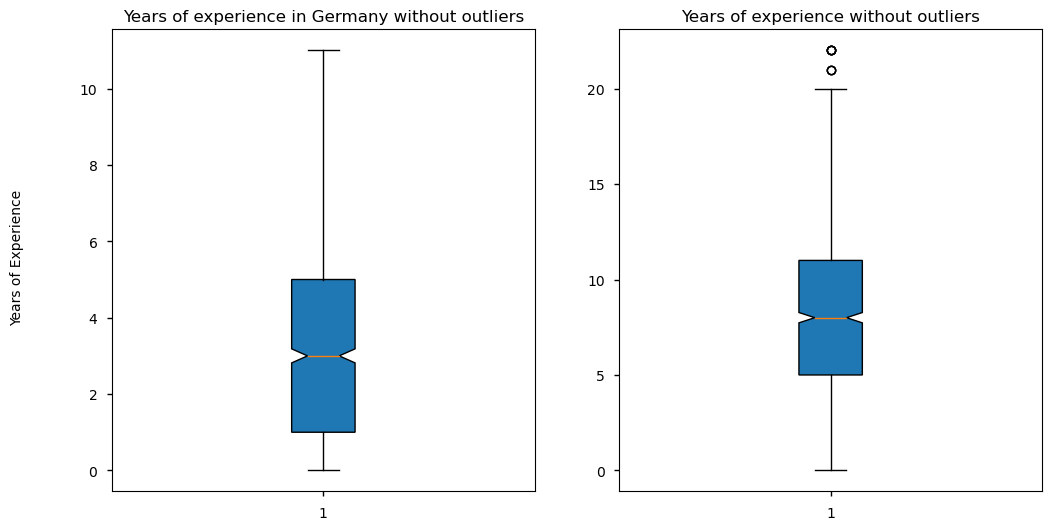

In [155]:
# subplots for years of experience in Germany and years of experience

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.text(0.04, 0.5, 'Years of Experience', va='center', rotation='vertical')

ax1.boxplot(ExpierenceYearsinGermanyOUT,notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax1.set_title('Years of experience in Germany without outliers')
ax2.boxplot(ExpierenceOUT,notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax2.set_title('Years of experience without outliers')

### SalaryYearAgo

count    8.850000e+02
mean     6.322459e+05
std      1.680508e+07
min      1.100000e+04
25%      5.500000e+04
50%      6.500000e+04
75%      7.500000e+04
max      5.000000e+08
Name: SalaryYearAgo, dtype: float64


count       839.000000
mean      65038.766389
std       14979.427553
min       25000.000000
25%       55000.000000
50%       65000.000000
75%       75000.000000
max      105000.000000
Name: SalaryYearAgo, dtype: float64

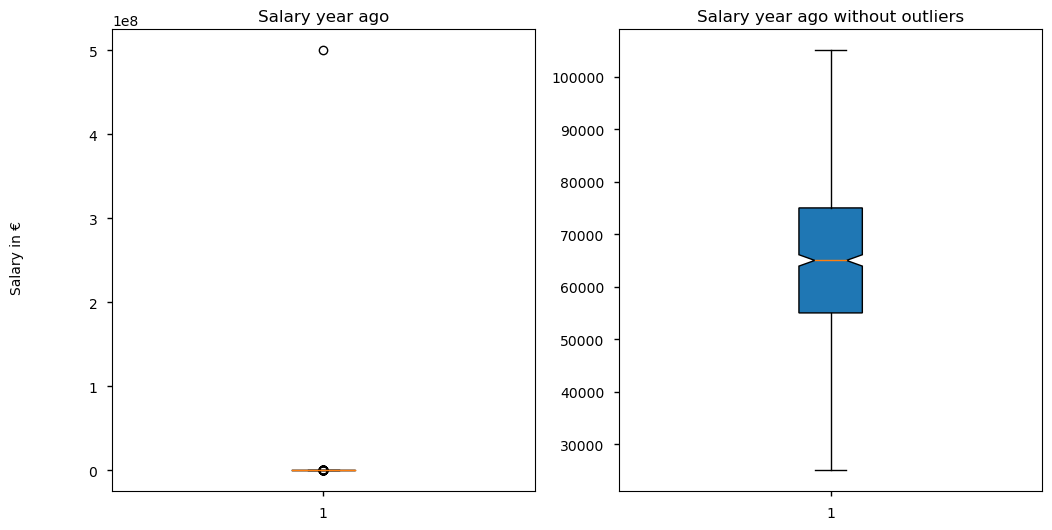

In [156]:
# SalaryYearAgo

SalaryYearAgo = df['SalaryYearAgo'].dropna()
SalaryYearAgo = pd.to_numeric(SalaryYearAgo.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

Q1 = SalaryYearAgo.quantile(0.25)
Q3 = SalaryYearAgo.quantile(0.75)
IQR = Q3 - Q1

SalaryYearAgoOUT = SalaryYearAgo[~((SalaryYearAgo < (Q1 - 1.5 * IQR)) |(SalaryYearAgo > (Q3 + 1.5 * IQR)))]

# create sublpots for salary year ago and salaryYearAgoOUT

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.text(0.04, 0.5, 'Salary in €', va='center', rotation='vertical')

ax1.boxplot(SalaryYearAgo)
ax1.set_title('Salary year ago')
ax2.boxplot(SalaryYearAgoOUT,notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax2.set_title('Salary year ago without outliers')

print(SalaryYearAgo.describe())
SalaryYearAgoOUT.describe()

### Salaries

count    1.253000e+03
mean     8.027904e+07
std      2.825061e+09
min      1.000100e+04
25%      5.880000e+04
50%      7.000000e+04
75%      8.000000e+04
max      1.000000e+11
Name: Salary, dtype: float64


count      1173.000000
mean      69016.847511
std       15864.104213
min       27000.000000
25%       60000.000000
50%       69000.000000
75%       80000.000000
max      111111.000000
Name: Salary, dtype: float64

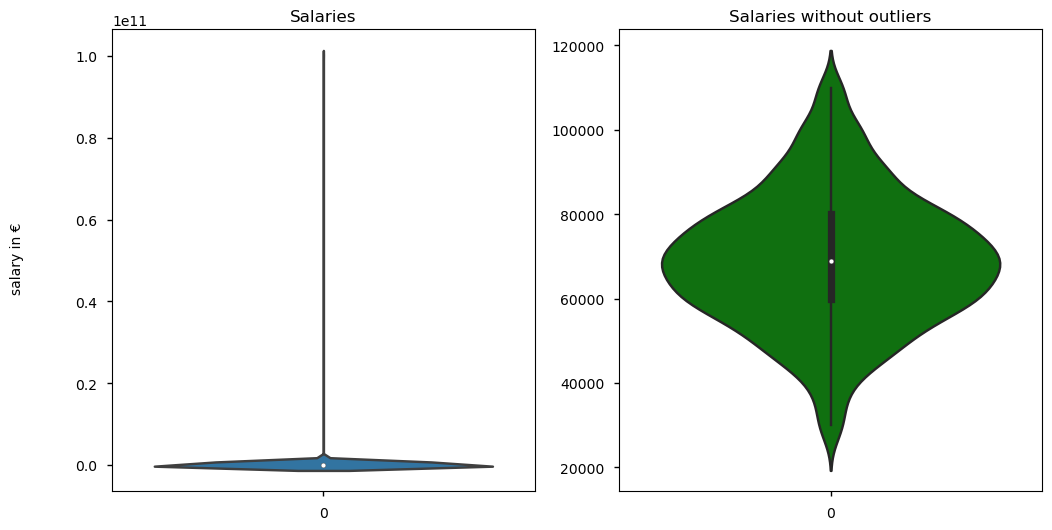

In [157]:
salaries = df['Salary'].dropna()

# create subplots for salary and salary without outliers

# clear outliers

Q1 = salaries.quantile(0.25)
Q3 = salaries.quantile(0.75)
IQR = Q3 - Q1

salariesWithoutOutliers = salaries[~((salaries < (Q1 - 1.5 * IQR)) |(salaries > (Q3 + 1.5 * IQR)))]

# create violin for salary and salary without outliers

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.text(0.04, 0.5, 'salary in €', va='center', rotation='vertical')
sns.violinplot(ax=ax1,data=salaries)
ax1.set_title('Salaries')



sns.violinplot(ax=ax2,data=salariesWithoutOutliers, color = 'green')
ax2.set_title('Salaries without outliers')

print(salaries.describe())
salariesWithoutOutliers.describe()

Text(0.5, 1.0, 'SalaryYearAgo without outliers')

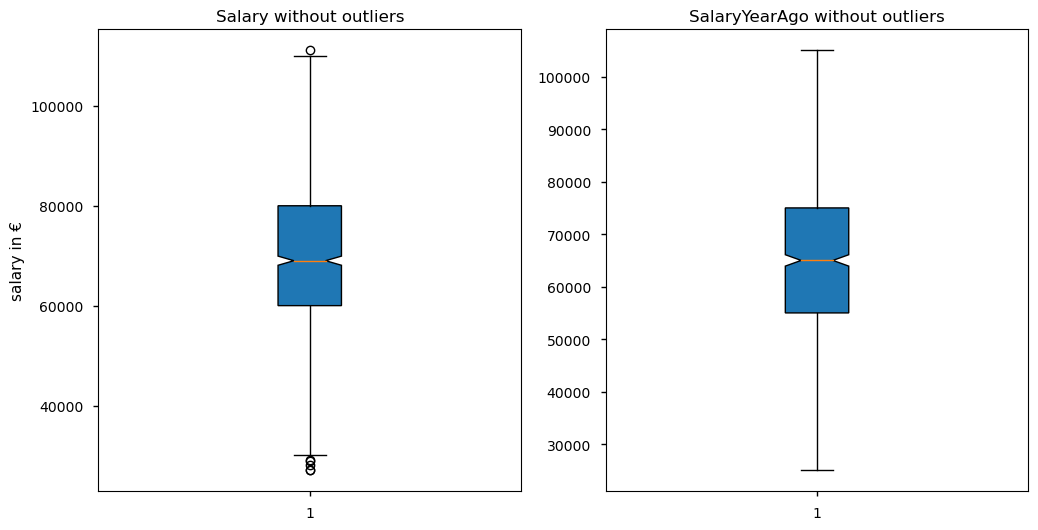

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.boxplot(salariesWithoutOutliers,notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax1.set_title('Salary without outliers')
ax1.set_ylabel('salary in €')
ax2.boxplot(SalaryYearAgoOUT,notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True)
ax2.set_title('SalaryYearAgo without outliers')

### CompanyTypes

<AxesSubplot:ylabel='CompanyType'>

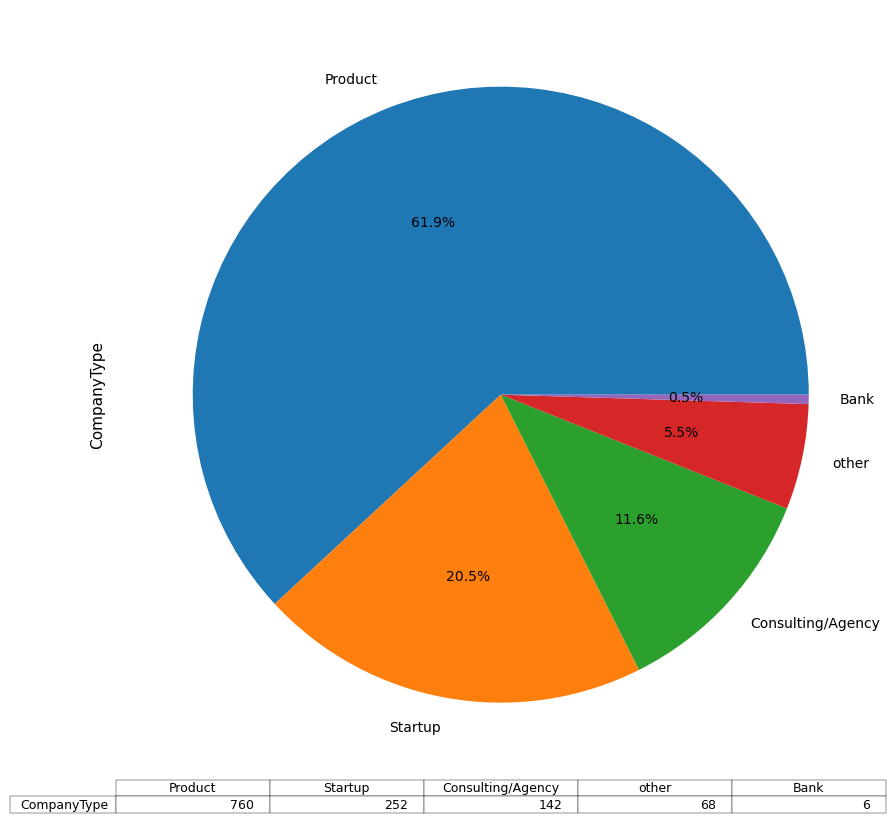

In [159]:
companyType = df['CompanyType'].dropna()
companyType = companyType.str.replace(' ', '')
companyType = companyType.str.replace(',', '')
companyType = companyType.str.replace(';', '')
companyType = companyType.str.replace('’', '')

# drop all rows with 'other' in companyType
companyType = companyType[~companyType.str.contains('other', na=False)]

# if item freqquency is less than 4, replace with 'other'
companyType = companyType.mask(companyType.map(companyType.value_counts()) < 4, 'other')

companyType.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), table=True)

### CompanySize

<AxesSubplot:title={'center':'Line graph of Company by size'}, xlabel='company size', ylabel='frequency'>

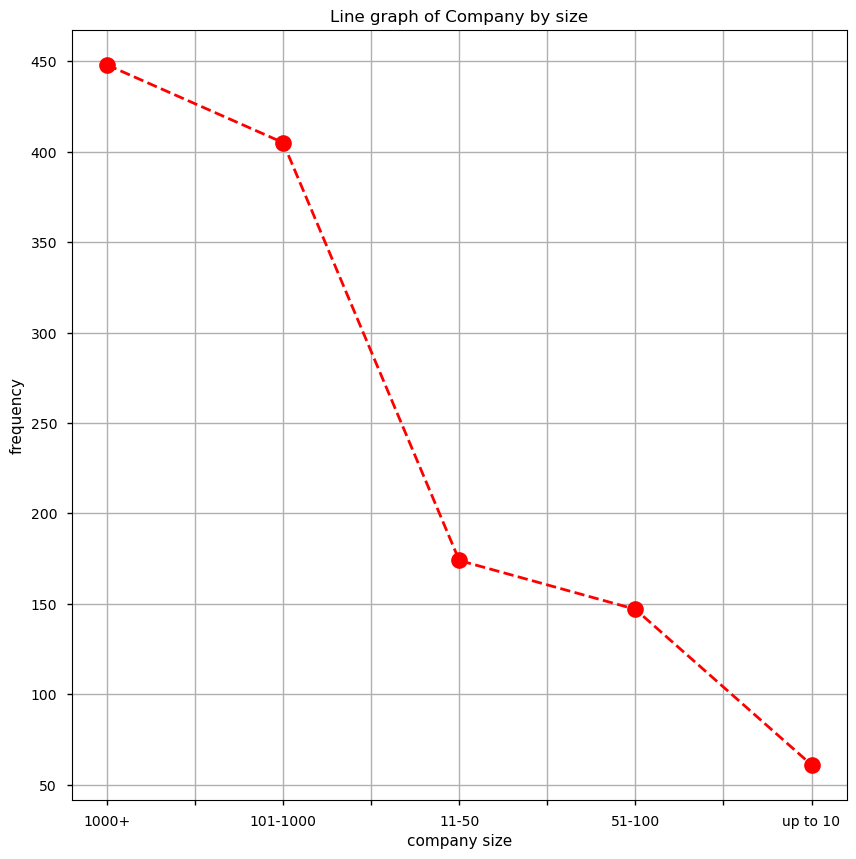

In [160]:
companySize = df['CompanySize'].dropna()
companySize.value_counts().plot(kind='line', figsize=(10, 10), title='Line graph of Company by size', grid=True,
 marker='o', color='red', linestyle='dashed', linewidth=2, markersize=12, y='Company size', ylabel='frequency', xlabel='company size')

### EmploymentStatus

<AxesSubplot:title={'center':'Employment status filtered'}>

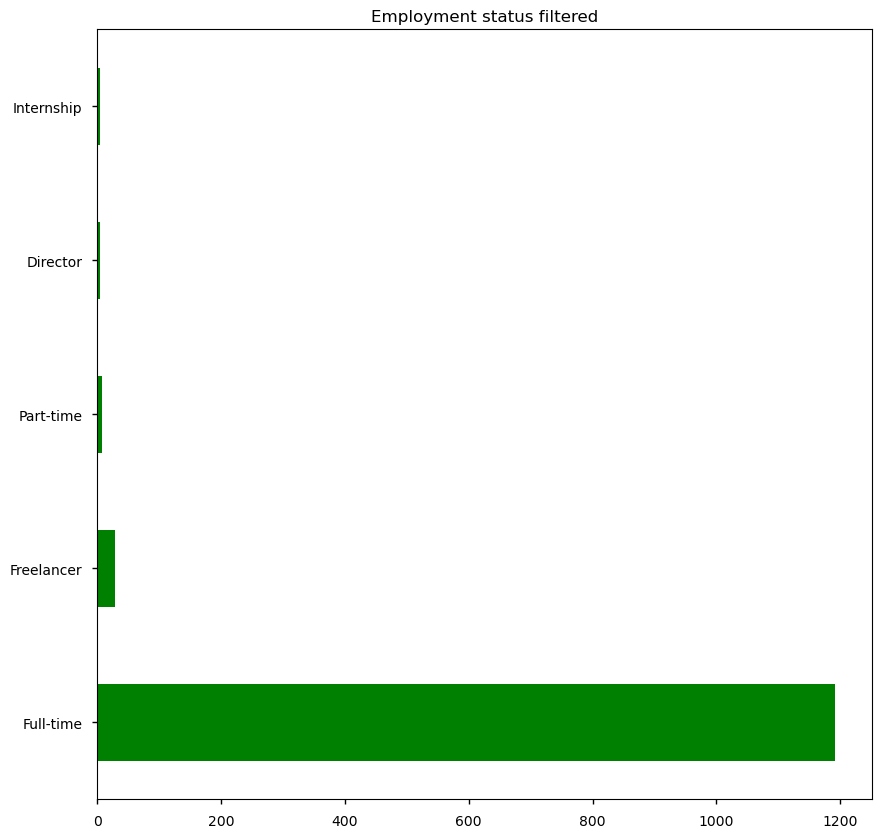

In [161]:
EmploymentStatus = df['Employment status'].dropna()

# join duplicates with different names
EmploymentStatus = EmploymentStatus.replace('Full-time employee', 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Full time employee', 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Full time', 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Full-time', 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Full-time position, part-time position, & self-employed (freelancing, tutoring)', 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Intern', 'Student')
EmploymentStatus = EmploymentStatus.replace('Werkstudent', 'Student')
EmploymentStatus = EmploymentStatus.replace('Working Student', 'Student')
EmploymentStatus = EmploymentStatus.replace('Working student', 'Student')
EmploymentStatus = EmploymentStatus.replace('working student', 'Student')
EmploymentStatus = EmploymentStatus.replace('Student', 'Internship')
EmploymentStatus = EmploymentStatus.replace("full-time, but 32 hours per week (it was my request, I'm a student)", 'Full-time')
EmploymentStatus = EmploymentStatus.replace('Part-time employee', 'Part-time')
EmploymentStatus = EmploymentStatus.replace('Founder', 'Director')
EmploymentStatus = EmploymentStatus.replace('Company Director', 'Director')
EmploymentStatus = EmploymentStatus.replace('Self-employed (freelancer)', 'Freelancer')

EmploymentStatus.value_counts().plot(kind='barh', figsize=(10, 10), title='Employment status filtered', color='green')

### SeniorityLevel

<AxesSubplot:title={'center':'Seniority Level'}>

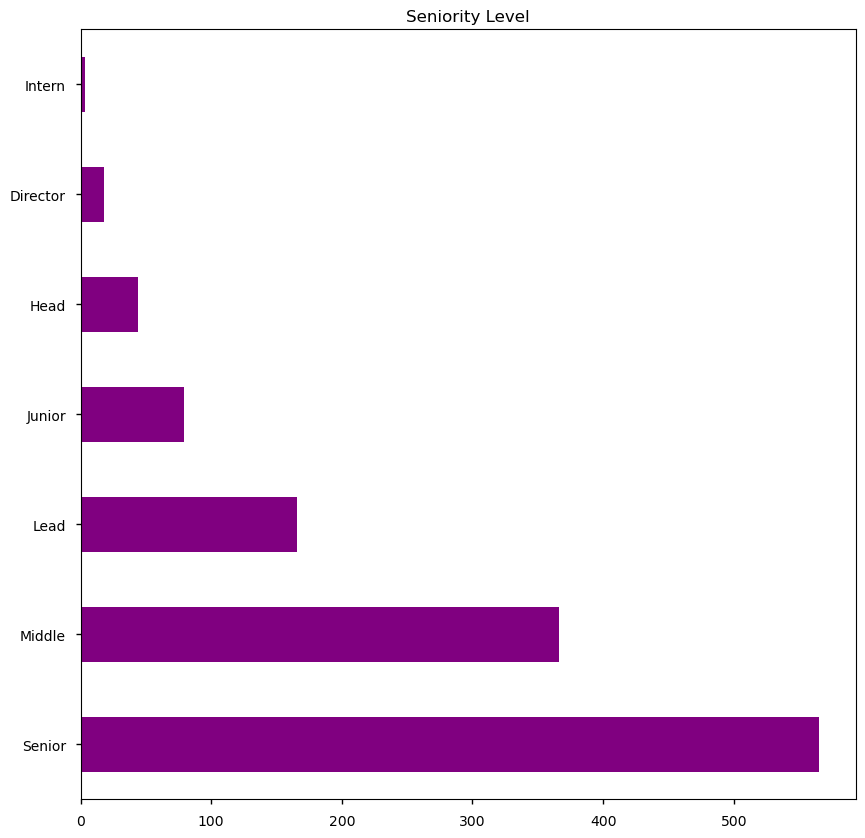

In [162]:
# create pie graph of Seniority Level
seniorityLevel = df['SeniorityLevel'].dropna()

seniorityLevel.mask(seniorityLevel.map(seniorityLevel.value_counts()) < 2, 'Director', inplace=True)
seniorityLevel.mask(seniorityLevel.map(seniorityLevel.value_counts()) < 5 , 'Intern', inplace=True)
seniorityLevel.value_counts().plot(kind='barh', figsize=(10, 10), title='Seniority Level', color='purple')

### City

<AxesSubplot:title={'center':'Cities with more than 10 respondents0'}, ylabel='City'>

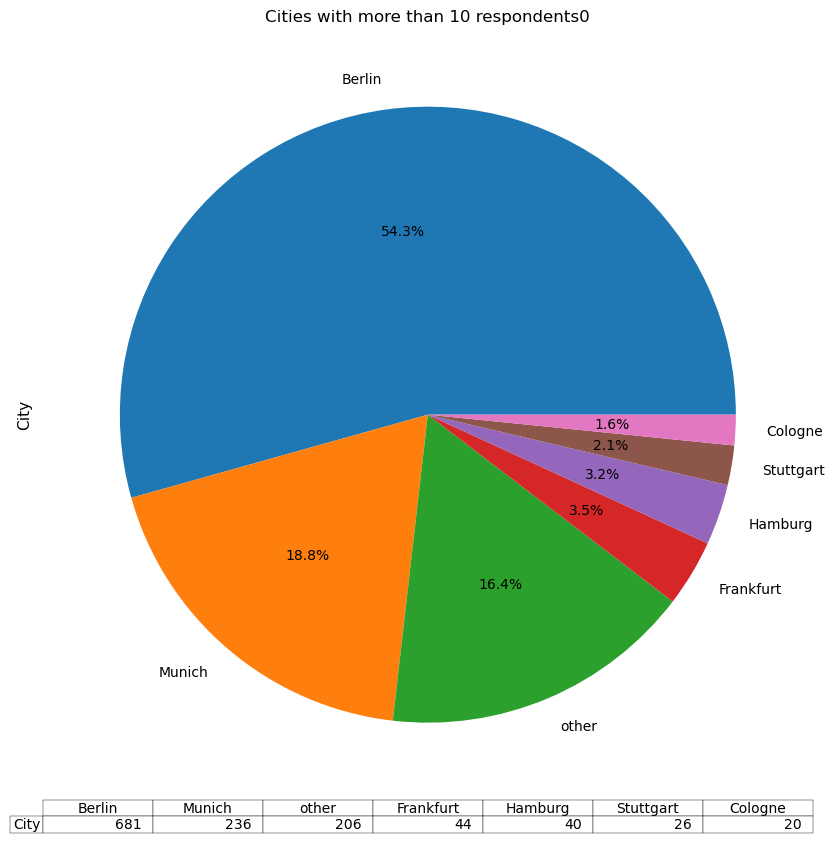

In [163]:
citySeries = df['City'].dropna()
citySeries= citySeries[~citySeries.str.contains('other', na=False)]
citySeries = citySeries.mask(citySeries.map(citySeries.value_counts()) <= 10, 'other')
citySeries.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Cities with more than 10 respondents0',  table=True)

### MainLanguage

<AxesSubplot:title={'center':'Main language at work'}>

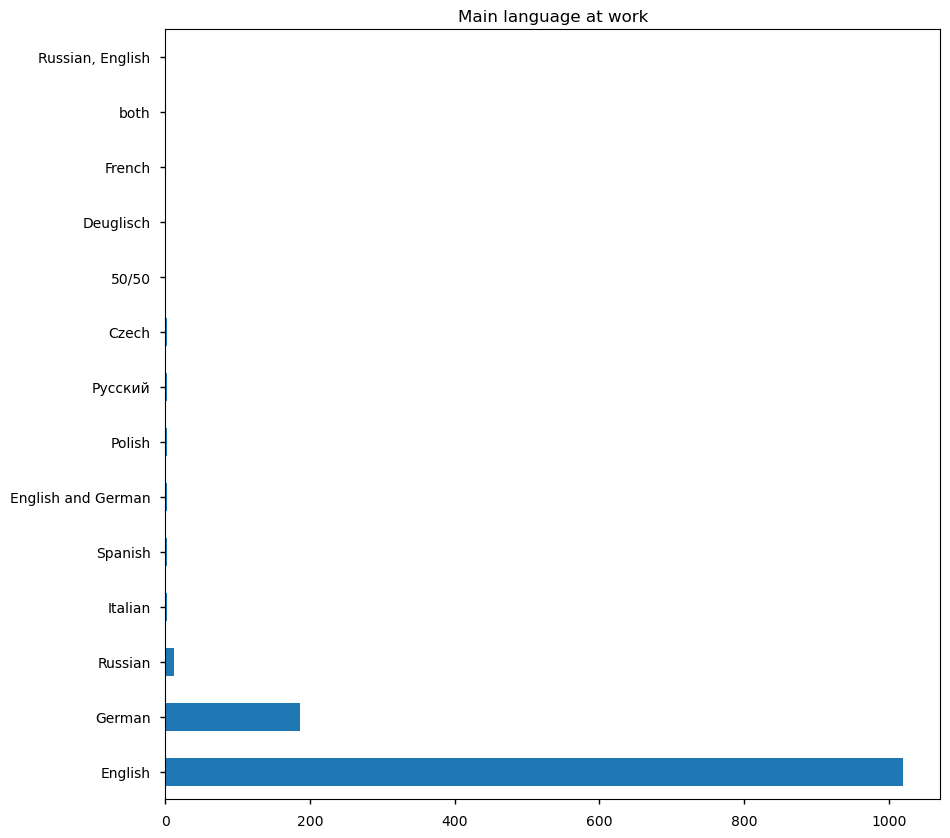

In [164]:
# main language in company unfiltered
df['Main language at work'].value_counts().plot(kind='barh', figsize=(10, 10), title='Main language at work')

English    1024
German      186
Russian      14
Italian       3
Spanish       3
Polish        2
Czech         2
French        1
Name: Main language at work, dtype: int64

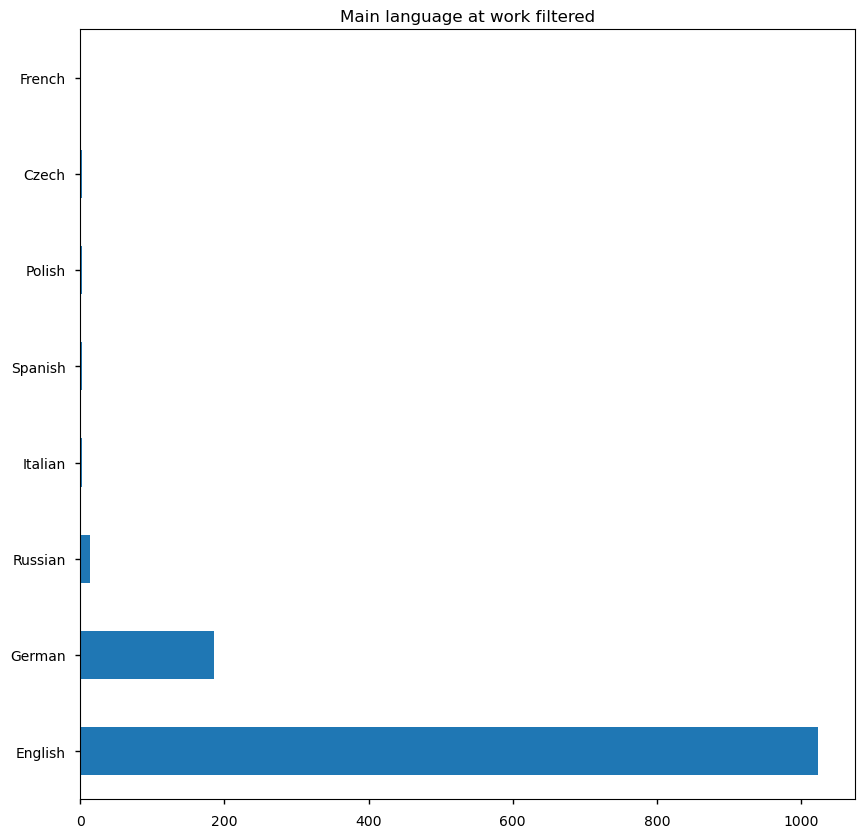

In [165]:
# main language in company filtered
mainLanguageSeries = df['Main language at work']
mainLanguageSeries.dropna(inplace=True)

mainLanguageSeries.replace('Russian, English', 'English', inplace=True)
mainLanguageSeries.replace('Deuglisch', 'English', inplace=True)
mainLanguageSeries.replace('English and German', 'English', inplace=True)
mainLanguageSeries.add('Gemrman')
mainLanguageSeries.replace('Русский', 'Russian', inplace=True)

# drop row with name '50/50'
mainLanguageSeries = mainLanguageSeries[~mainLanguageSeries.str.contains('50/50', na=False)]
mainLanguageSeries = mainLanguageSeries[~mainLanguageSeries.str.contains('both', na=False)]
mainLanguageSeries.value_counts().plot(kind='barh', figsize=(10, 10), title='Main language at work filtered')
mainLanguageSeries.value_counts()

### Programming Languagues

(-0.5, 799.5, 599.5, -0.5)

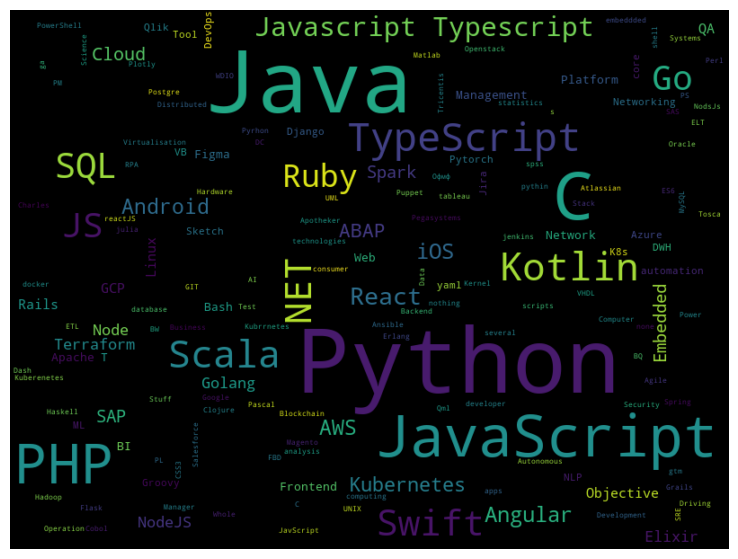

In [166]:
# create wordcloud for main programming language
text_select = df['Your main technology / programming language'].dropna()
# convert to string
text_select = text_select.astype(str)
text = " ".join(txt for txt in text_select)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=500,
                      width = 800, height = 600,
                      background_color='black').generate(text)

plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

<AxesSubplot:title={'center':'Programming languages used by more than 10 respondents filtered'}>

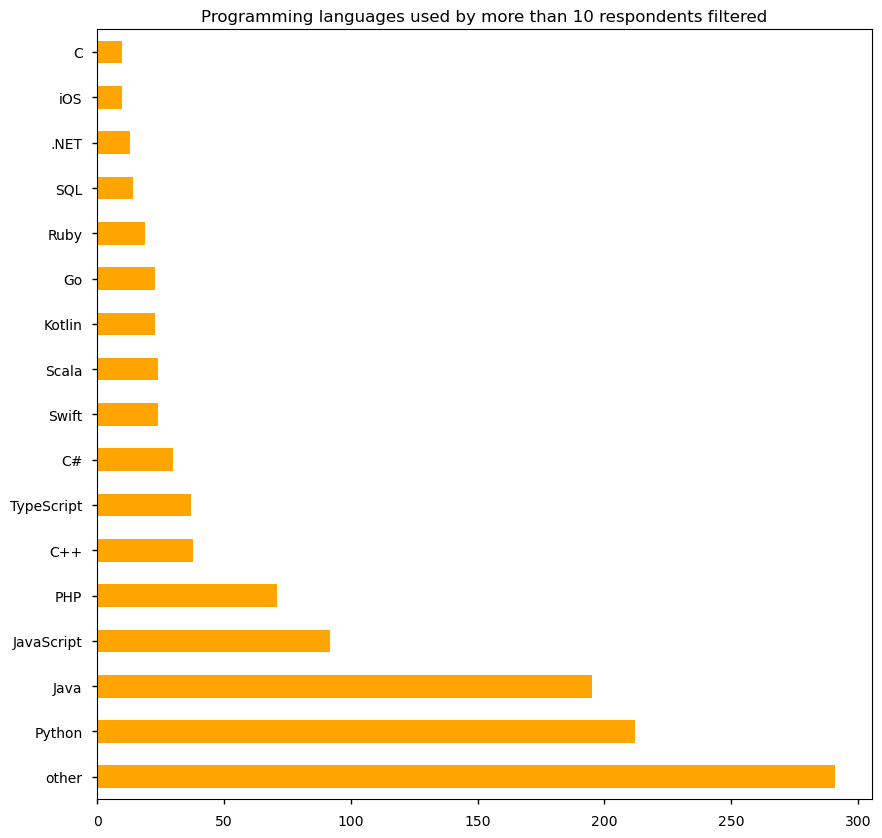

In [167]:
programmingLanguageSeries = df['Your main technology / programming language'].dropna()
programmingLanguageSeries = programmingLanguageSeries.str.replace(' ', '')
programmingLanguageSeries = programmingLanguageSeries.str.replace(',', '')
programmingLanguageSeries = programmingLanguageSeries.str.replace(';', '')
programmingLanguageSeries = programmingLanguageSeries.str.replace('’', '')
programmingLanguageSeries = programmingLanguageSeries.str.replace('python', 'Python')
programmingLanguageSeries = programmingLanguageSeries.str.replace('Javascript', 'JavaScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('JS', 'JavaScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('javascript', 'JavaScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('Typescript', 'TypeScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('typescript', 'TypeScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('JavaScript/TypeScript', 'TypeScript')
programmingLanguageSeries = programmingLanguageSeries.str.replace('java', 'Java')
programmingLanguageSeries = programmingLanguageSeries.str.replace('php', 'PHP')
programmingLanguageSeries = programmingLanguageSeries.str.replace('Php', 'PHP')

programmingLanguageSeries.mask(programmingLanguageSeries.map(programmingLanguageSeries.value_counts()) < 10, 'other', inplace=True)
programmingLanguageSeries.value_counts().plot(kind='barh', figsize=(10, 10), title='Programming languages used by more than 10 respondents filtered', color='orange')

(-0.5, 799.5, 599.5, -0.5)

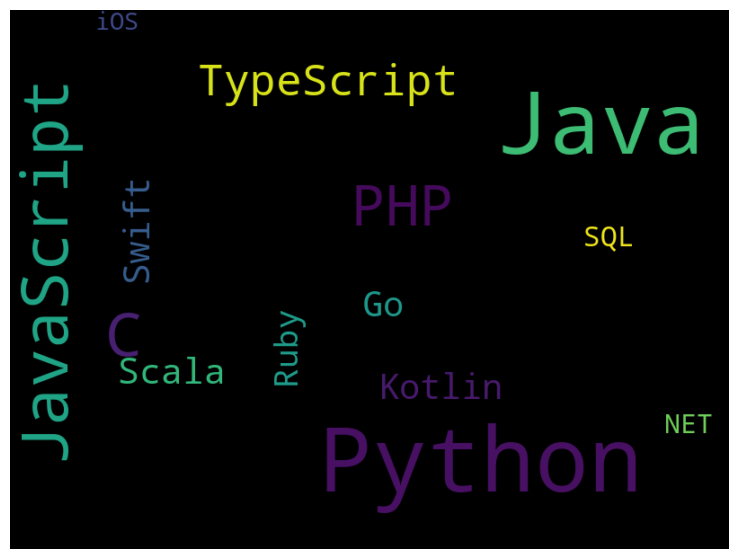

In [168]:
# create wordcloud for other tech/PLs
programmingLanguageSeries = programmingLanguageSeries.astype(str)
text = " ".join(txt for txt in programmingLanguageSeries)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=500,
                      width = 800, height = 600,
                      background_color='black').generate(text)

plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Other Programming Languagues

(-0.5, 799.5, 599.5, -0.5)

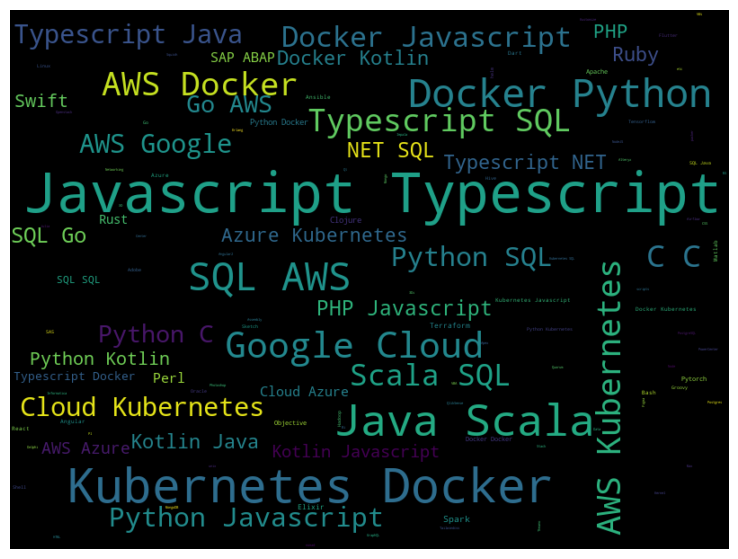

In [169]:
# create wordcloud for other tech/PLs
text_select = df['Other technologies/programming languages you use often'].dropna()
# convert to string
text_select = text_select.astype(str)
text = " ".join(txt for txt in text_select)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=500,
                      width = 800, height = 600,
                      background_color='black').generate(text)

plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

<AxesSubplot:title={'center':'Programming languages used by more than 10 respondents filtered'}>

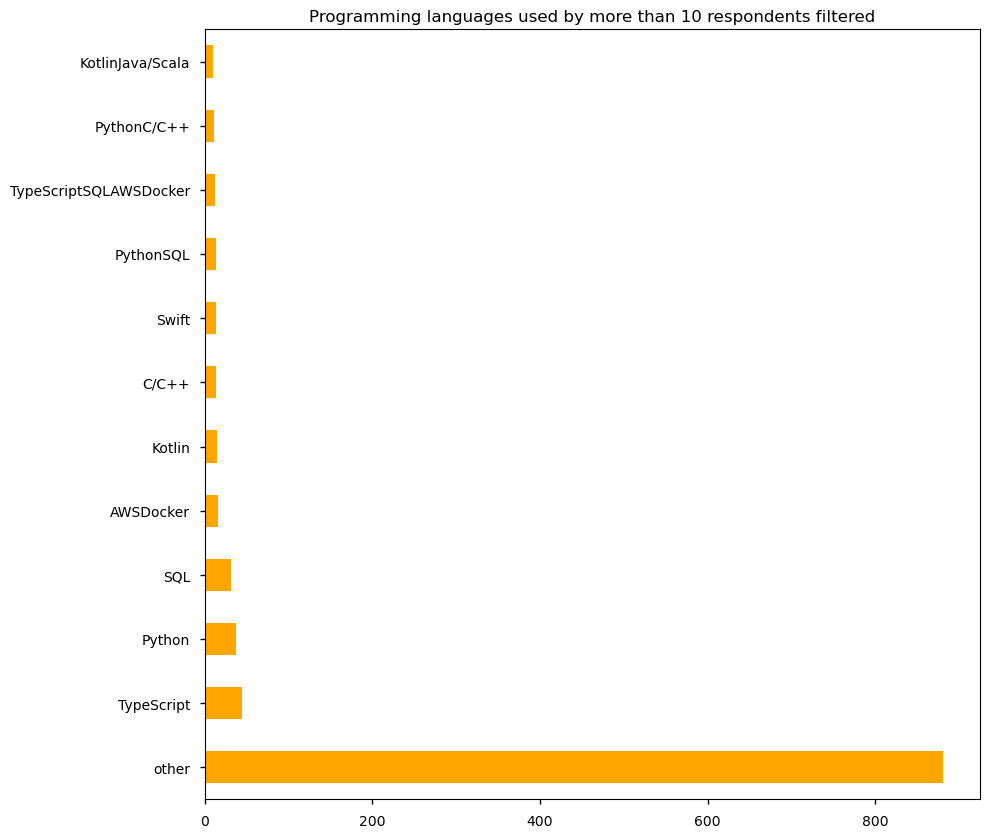

In [170]:
otherProgrammingLanguageSeries = df['Other technologies/programming languages you use often'].dropna()
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace(' ', '')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace(',', '')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace(';', '')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('’', '')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('python', 'Python')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('Javascript', 'JavaScript')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('JS', 'JavaScript')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('javascript', 'JavaScript')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('Typescript', 'TypeScript')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('typescript', 'TypeScript')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('JavaScript/TypeScript', 'TypeScript')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('java', 'Java')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('php', 'PHP')
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.str.replace('Php', 'PHP')

otherProgrammingLanguageSeries.mask(otherProgrammingLanguageSeries.map(otherProgrammingLanguageSeries.value_counts()) < 10, 'other', inplace=True)
otherProgrammingLanguageSeries.value_counts().plot(kind='barh', figsize=(10, 10), title='Programming languages used by more than 10 respondents filtered', color='orange')

(-0.5, 799.5, 599.5, -0.5)

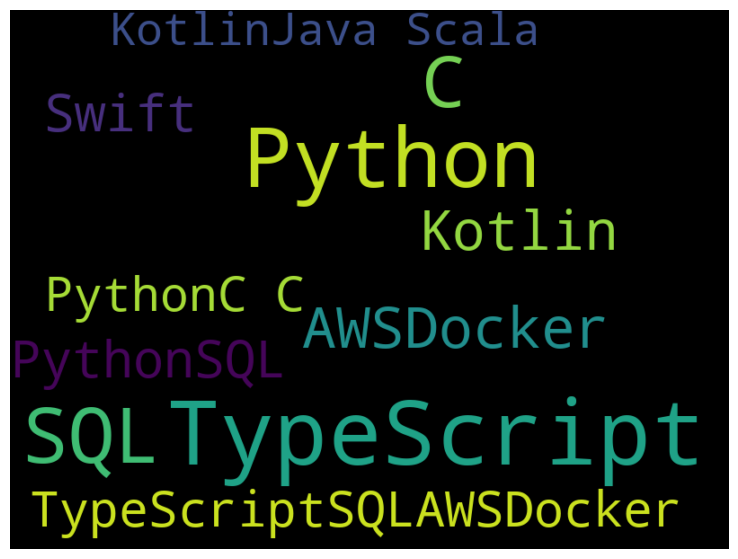

In [171]:
# create wordcloud for other tech/PLs
otherProgrammingLanguageSeries = otherProgrammingLanguageSeries.astype(str)
text = " ".join(txt for txt in otherProgrammingLanguageSeries)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=500,
                      width = 800, height = 600,
                      background_color='black').generate(text)

plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Lost job due to coronavirus

<AxesSubplot:title={'center':'Lost job due to corona filtered'}, ylabel='LostJobDueToCorona'>

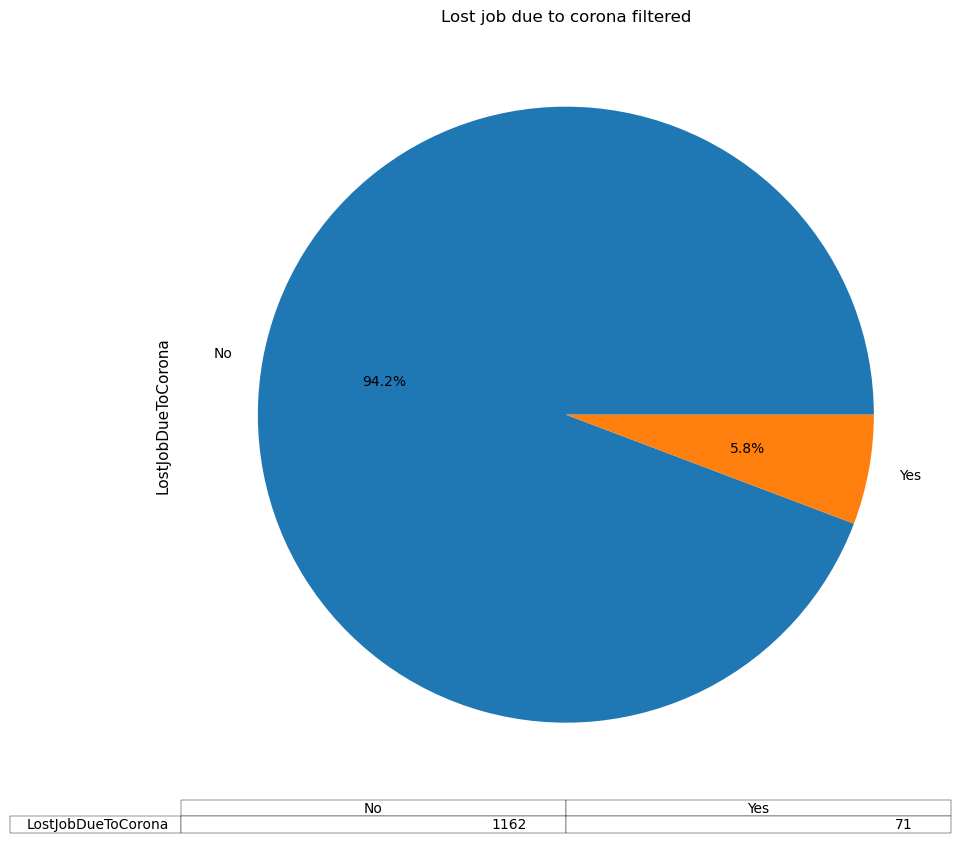

In [172]:
# create pie graph of LostJobDueToCorona

LostJobDueToCorona = df['LostJobDueToCorona'].dropna()

LostJobDueToCorona.mask(LostJobDueToCorona.map(LostJobDueToCorona.value_counts()) < 10, 'Yes', inplace=True)
LostJobDueToCorona.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Lost job due to corona filtered', table=True)

### Gender

<AxesSubplot:title={'center':'Gender'}, ylabel='Gender'>

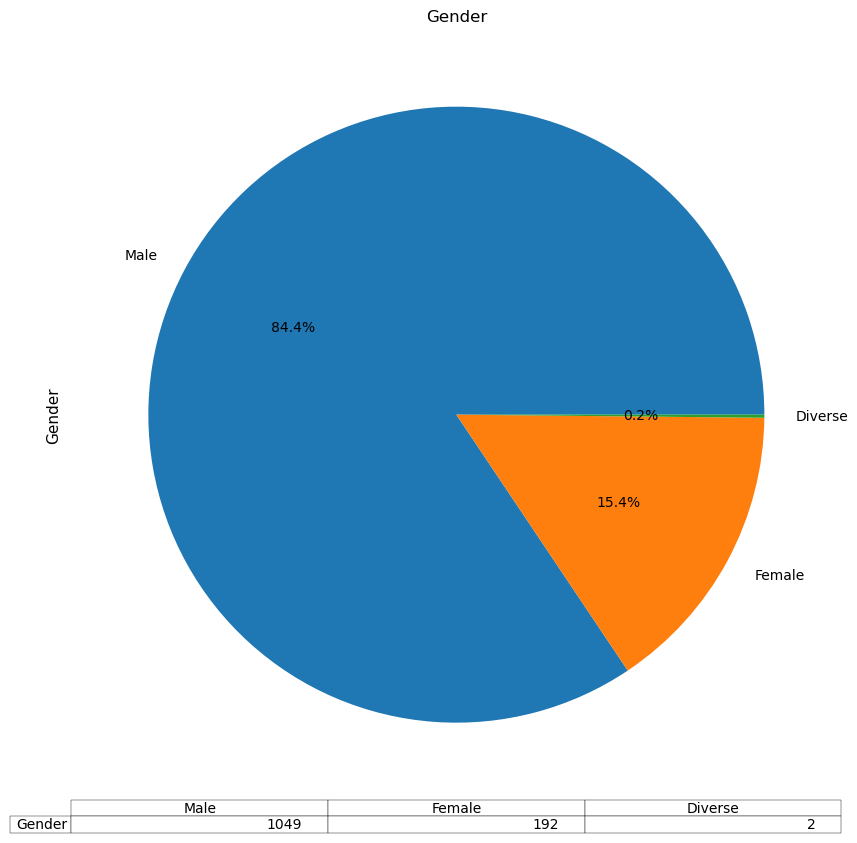

In [173]:
genderSeries = df['Gender'].dropna()
genderSeries.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title='Gender', table=True)

### Position

<AxesSubplot:title={'center':'Position'}, ylabel='Position'>

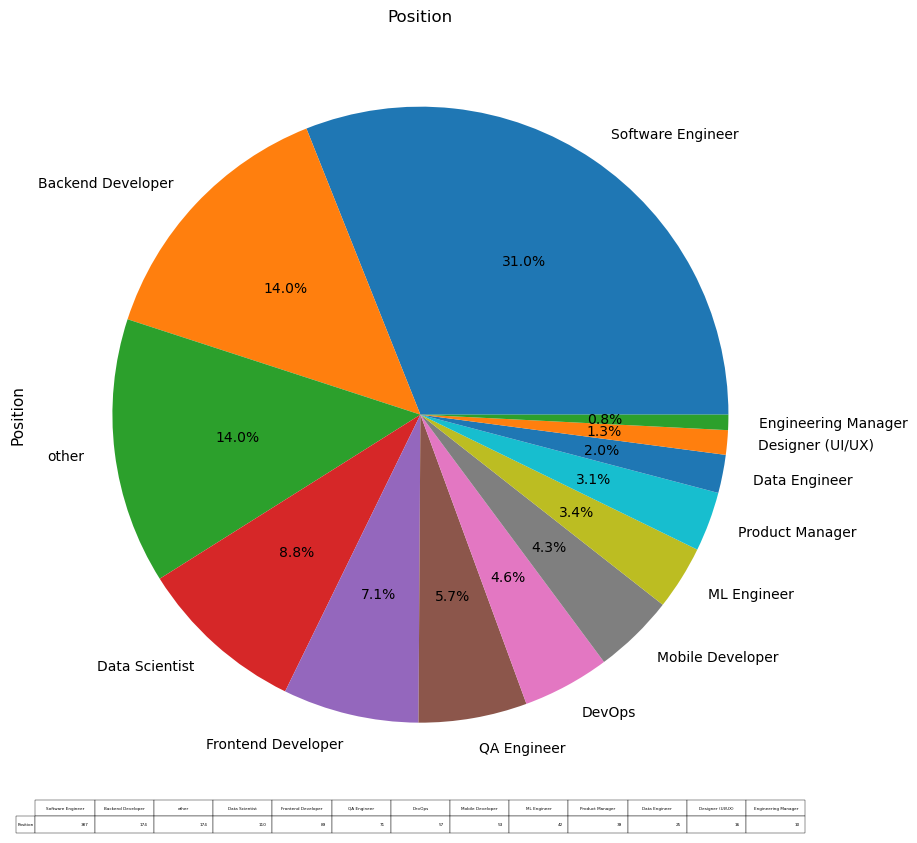

In [174]:
positionSeries = df['Position'].dropna()

positionSeries.mask(positionSeries.map(positionSeries.value_counts()) < 10, 'other', inplace=True)

positionSeries.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), title='Position', table=True)

### Yearly bonus + stocks in EUR

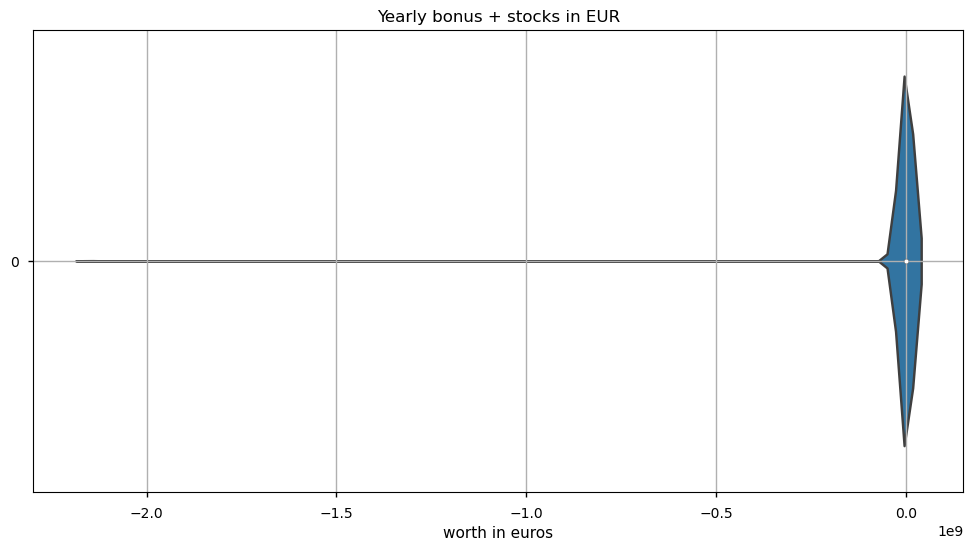

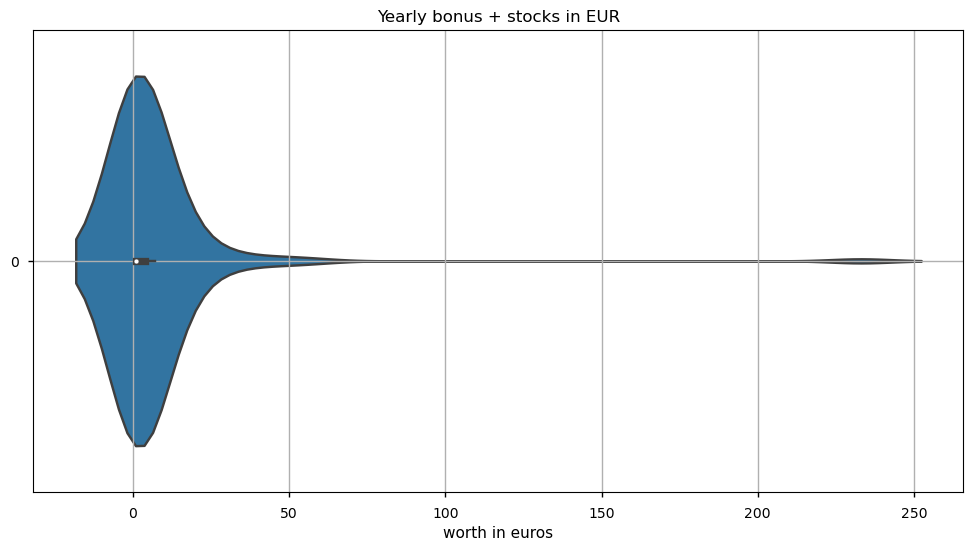

<AxesSubplot:title={'center':'StocksYearAgoSameCountry'}>

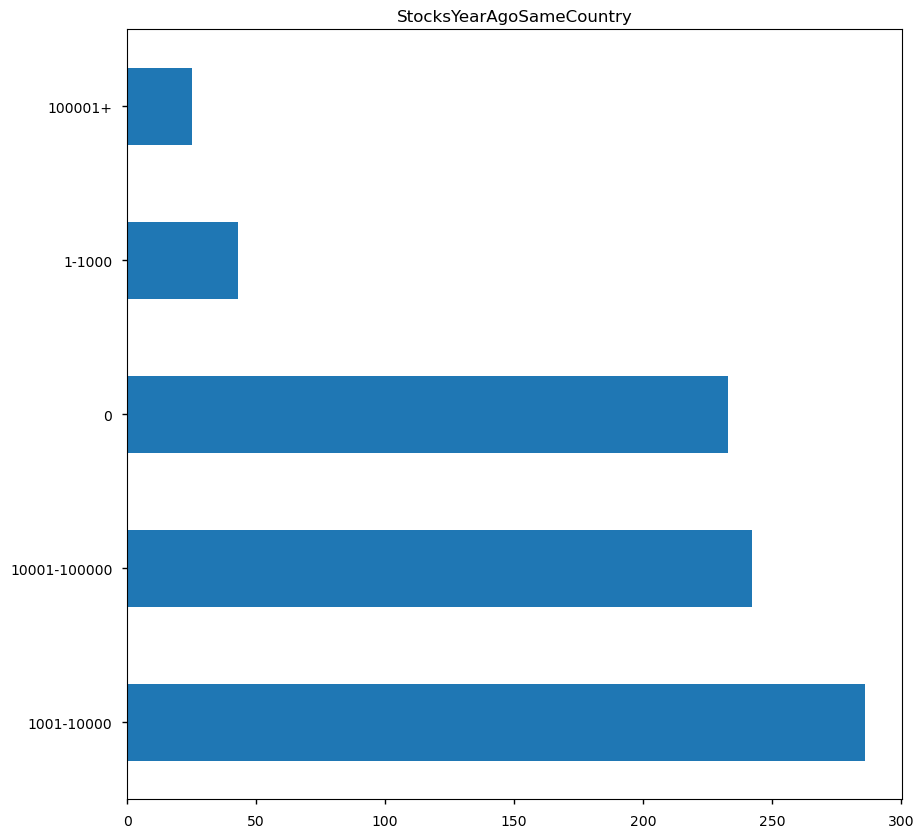

In [175]:
# graph for yearly bonus + stocks in EUR

yearlyBonusSeries = df['Yearly bonus + stocks in EUR'].dropna()

# remove all non numeric characters
yearlyBonusSeries = yearlyBonusSeries.str.replace(' ', '')
yearlyBonusSeries = yearlyBonusSeries.str.replace(',', '')
yearlyBonusSeries = yearlyBonusSeries.str.replace('€', '')


# convert to numeric
yearlyBonusSeries = pd.to_numeric(yearlyBonusSeries.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
yearlyBonusSeries.describe().to_csv(Path('./analyzedData/yearlyBonusSeriesStats.csv'))

plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))
sns.violinplot(data=yearlyBonusSeries, orient='h')
plt.grid()
plt.title('Yearly bonus + stocks in EUR')
plt.xlabel('worth in euros')

# IQR
Q1 = yearlyBonusSeries.quantile(0.25)
Q3 = yearlyBonusSeries.quantile(0.75)
IQR = Q3 - Q1

# remove outliers
yearlyBonusSeriesIQR = yearlyBonusSeries[~((yearlyBonusSeries < (Q1 - 1.5 * IQR)) |(yearlyBonusSeries > (Q3 + 1.5 * IQR)))]
yearlyBonusSeriesIQR = yearlyBonusSeriesIQR.sort_values(ascending=True)
yearlyBonusSeriesIQR = yearlyBonusSeriesIQR.value_counts(sort=True, ascending=True)

# plot in violin plot

plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))
sns.violinplot(data=yearlyBonusSeriesIQR, orient='h')
plt.grid()
plt.title('Yearly bonus + stocks in EUR')
plt.xlabel('worth in euros')
plt.show()
plt.close()


# map dfStocksYearAgoSameCountry to 5 categories
yearlyBonusSeries = yearlyBonusSeries.apply(lambda x: '0' if x == 0 else '1-1000' if x > 0 and x <= 1000 else '1001-10000' if x > 1000 and x <= 10000 else '10001-100000' if x > 10000 and x <= 100000 else '100001+')

# plot in bar chart
yearlyBonusSeries.value_counts().plot(kind='barh',  figsize=(10, 10), title='StocksYearAgoSameCountry')

### StocksYearAgoSameCountry

count    6.140000e+02
mean     1.028591e+05
std      2.017246e+06
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+03
75%      3.630000e+04
max      5.000000e+07
Name: StocksYearAgoSameCountry, dtype: float64


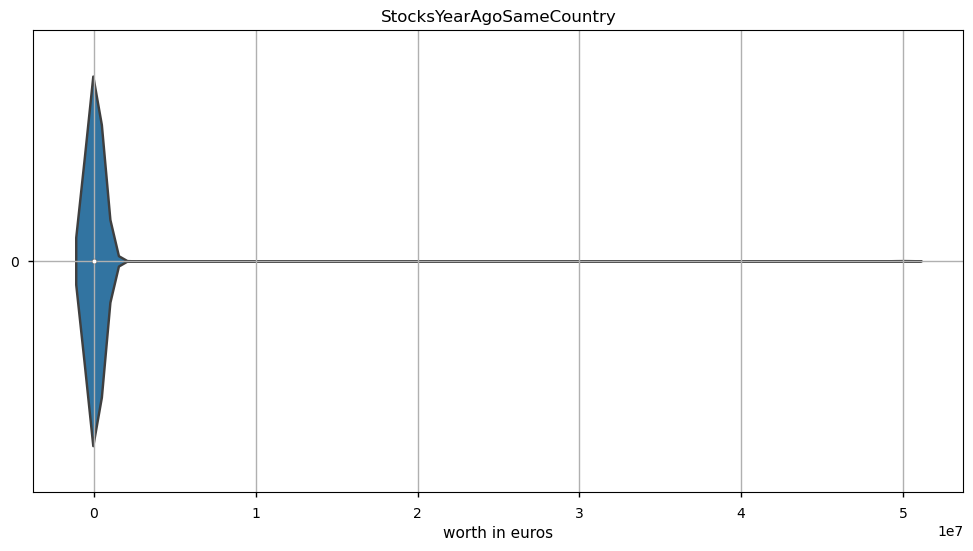

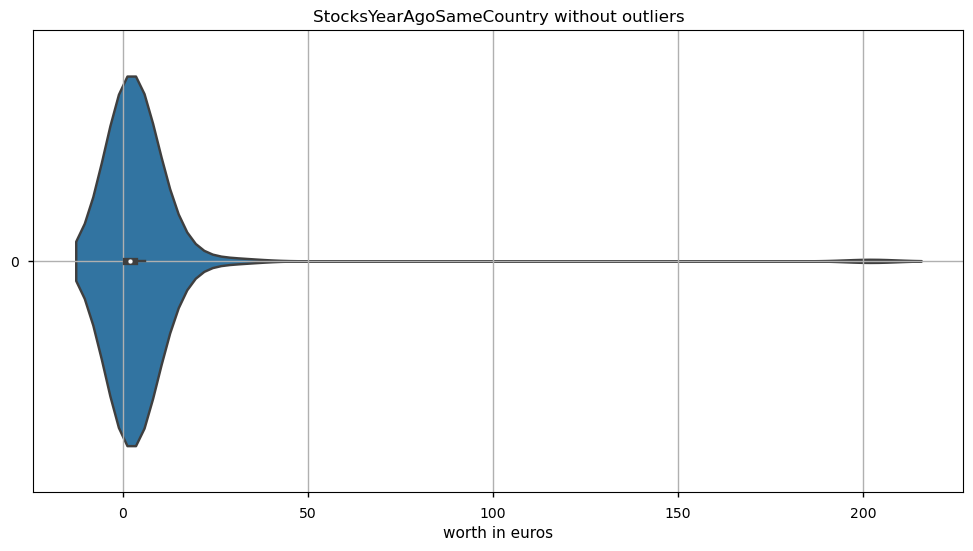

count    129.000000
mean       4.759690
std       18.041088
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max      202.000000
Name: StocksYearAgoSameCountry, dtype: float64


<AxesSubplot:title={'center':'StocksYearAgoSameCountry'}>

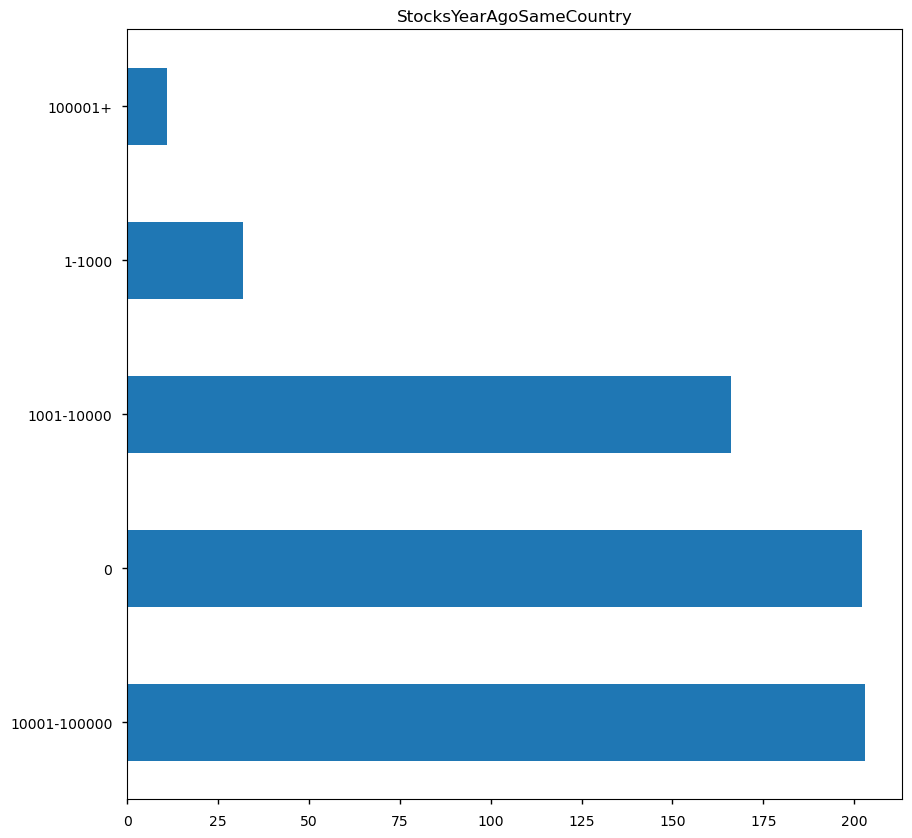

In [176]:
dfStocksYearAgoSameCountry = df['StocksYearAgoSameCountry'].dropna()

# remove all non numeric characters
dfStocksYearAgoSameCountry = dfStocksYearAgoSameCountry.str.replace(' ', '')
dfStocksYearAgoSameCountry = dfStocksYearAgoSameCountry.str.replace(',', '')
dfStocksYearAgoSameCountry = dfStocksYearAgoSameCountry.str.replace('€', '')

# convert to numeric
dfStocksYearAgoSameCountry = pd.to_numeric(dfStocksYearAgoSameCountry.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

# plot in violin plot

plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))
sns.violinplot(data=dfStocksYearAgoSameCountry, orient='h')
plt.grid()
plt.title('StocksYearAgoSameCountry')
plt.xlabel('worth in euros')

dfStocksYearAgoSameCountry.describe().to_csv(Path('./analyzedData/StocksYearAgoSameCountryStats.csv'))
print(dfStocksYearAgoSameCountry.describe())

# IQR
Q1 = dfStocksYearAgoSameCountry.quantile(0.25)
Q3 = dfStocksYearAgoSameCountry.quantile(0.75)  
IQR = Q3 - Q1

# remove outliers
dfStocksYearAgoSameCountryIQR = dfStocksYearAgoSameCountry[~((dfStocksYearAgoSameCountry < (Q1 - 1.5 * IQR)) |(dfStocksYearAgoSameCountry > (Q3 + 1.5 * IQR)))]
dfStocksYearAgoSameCountryIQR = dfStocksYearAgoSameCountry.sort_values(ascending=True)
dfStocksYearAgoSameCountryIQR = dfStocksYearAgoSameCountry.value_counts(sort=True, ascending=True)


# plot in violin plot

plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))
sns.violinplot(data=dfStocksYearAgoSameCountryIQR, orient='h')
plt.grid()
plt.title('StocksYearAgoSameCountry without outliers')
plt.xlabel('worth in euros')
plt.show()
plt.close()

dfStocksYearAgoSameCountryIQR.describe().to_csv(Path('./analyzedData/StocksYearAgoSameCountryStatsFiltered.csv'))
print(dfStocksYearAgoSameCountryIQR.describe())

# map dfStocksYearAgoSameCountry to 5 categories
dfStocksYearAgoSameCountry = dfStocksYearAgoSameCountry.apply(lambda x: '0' if x == 0 else '1-1000' if x > 0 and x <= 1000 else '1001-10000' if x > 1000 and x <= 10000 else '10001-100000' if x > 10000 and x <= 100000 else '100001+')

# plot in bar chart
dfStocksYearAgoSameCountry.value_counts().plot(kind='barh',  figsize=(10, 10), title='StocksYearAgoSameCountry')

### ShortWeekHours

Text(0.5, 0, 'Hours')

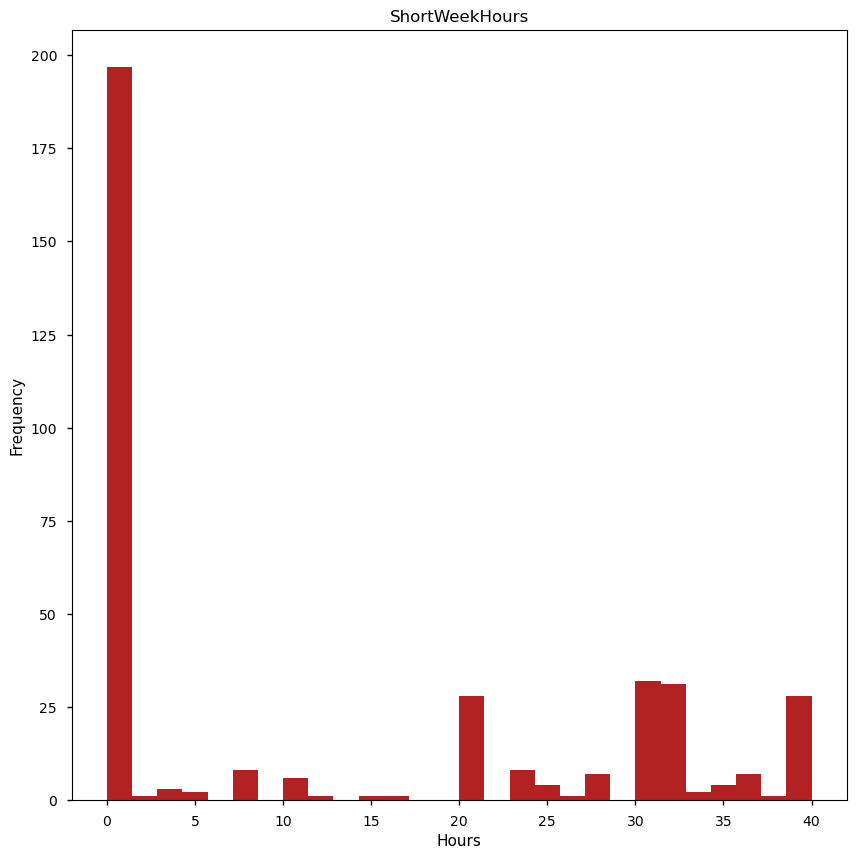

In [177]:
shortWeekHours = df['ShortWeekHours'].dropna()

# convert to numeric
shortWeekHours = pd.to_numeric(shortWeekHours.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

ax = shortWeekHours.plot(kind='hist', bins=28, figsize=(10, 10), title='ShortWeekHours', color='firebrick')
ax.set_xlabel('Hours')

### CovidSupport

Text(0.5, 0, 'worth in euros')

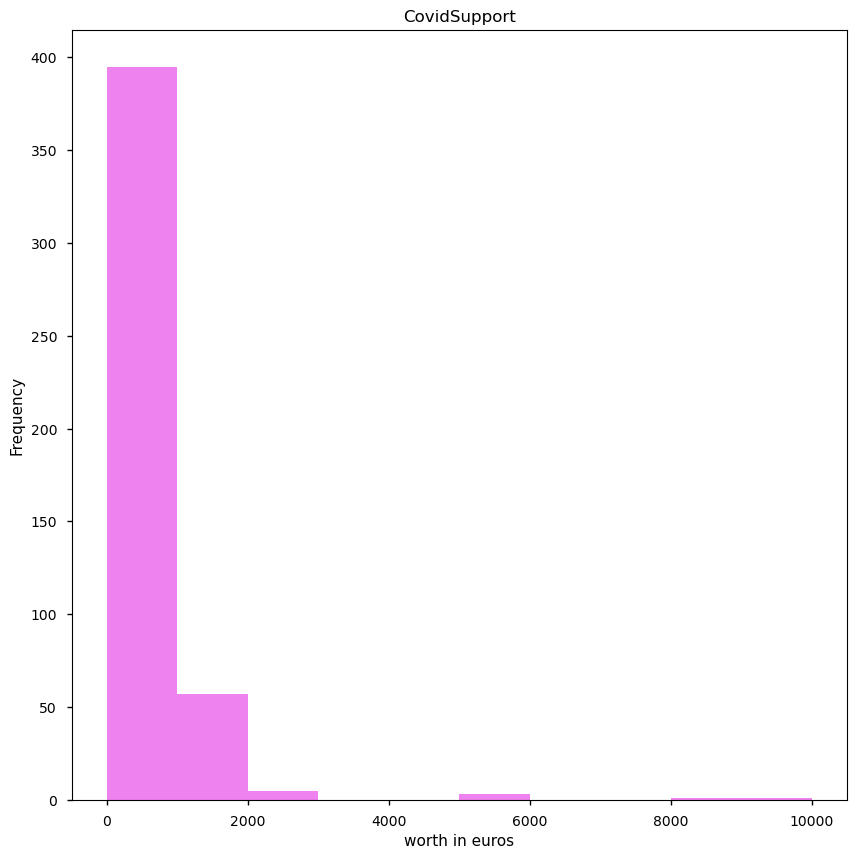

In [178]:
covidSupport = df['CovidSupport'].dropna()

# convert to numeric
covidSupport = pd.to_numeric(covidSupport.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

ax = covidSupport.plot(kind='hist', bins=10, figsize=(10, 10), title='CovidSupport', color='violet')
ax.set_xlabel('worth in euros')

### ContractDuration

<AxesSubplot:title={'center':'ContractDuration'}, ylabel='Сontract duration'>

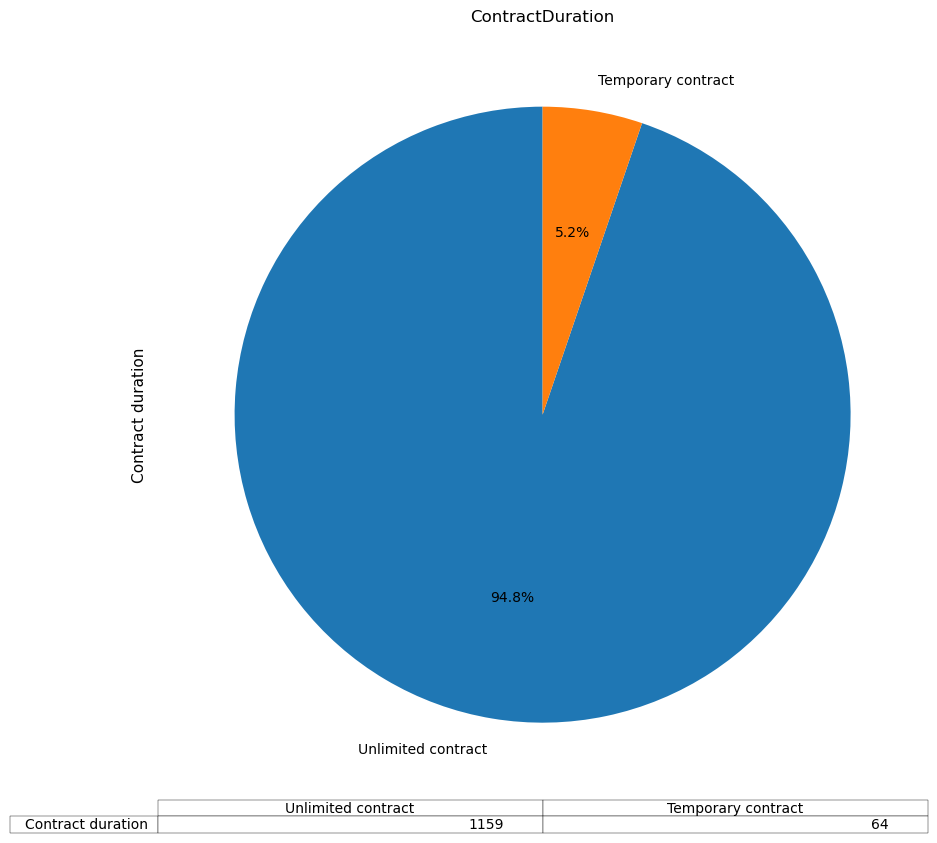

In [179]:
ContractDuration = df['Сontract duration'].dropna()

ContractDuration.drop(ContractDuration[ContractDuration == '0'].index, inplace=True)

ContractDuration.value_counts().plot(kind='pie',figsize=(10, 10), title='ContractDuration', autopct='%1.1f%%', rot=180, table=True, startangle=90)

### Gender And Salary

Text(0, 0.5, 'Count')

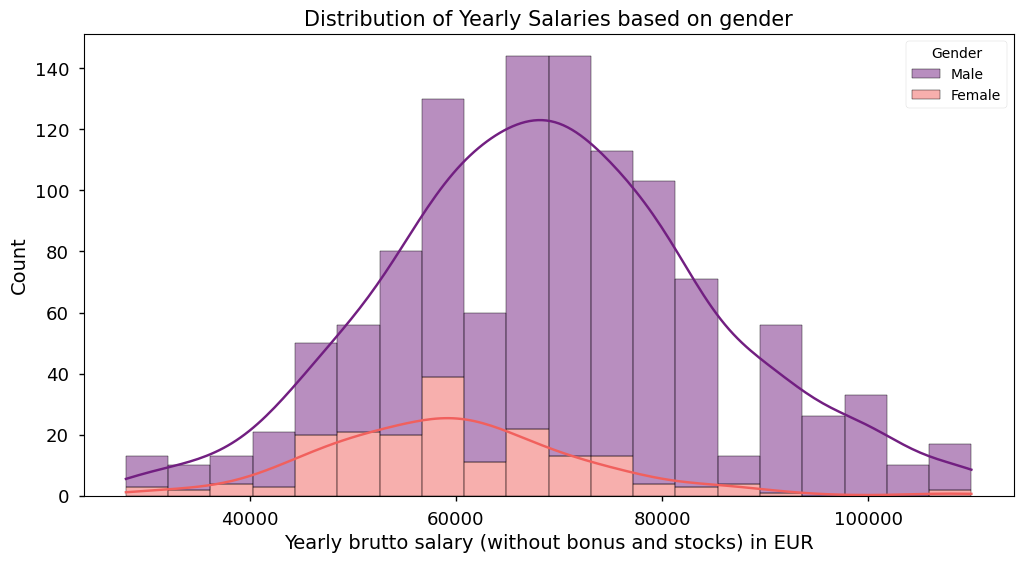

In [180]:
feature = 'Salary'

p25 = df[feature].quantile(0.25) 
p75 = df[feature].quantile(0.75) 
iqr = p75 - p25 

upper_limit = p75 + 1.5 * iqr 
lower_limit = p25 - 1.5 * iqr 

# New DataFrame after removing the outlier 
new_df = df[(df[feature] > lower_limit) & (df[feature] < upper_limit)]

# Distribution of Yearly Salaries 
plt.figure(figsize=(12,6))
sns.histplot(x='Salary',data=new_df,
             bins=20, kde=True, hue='Gender',multiple="stack",palette='magma')
plt.xticks(fontsize=13)
plt.title('Distribution of Yearly Salaries based on gender',fontsize=15)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)

### Salary and features

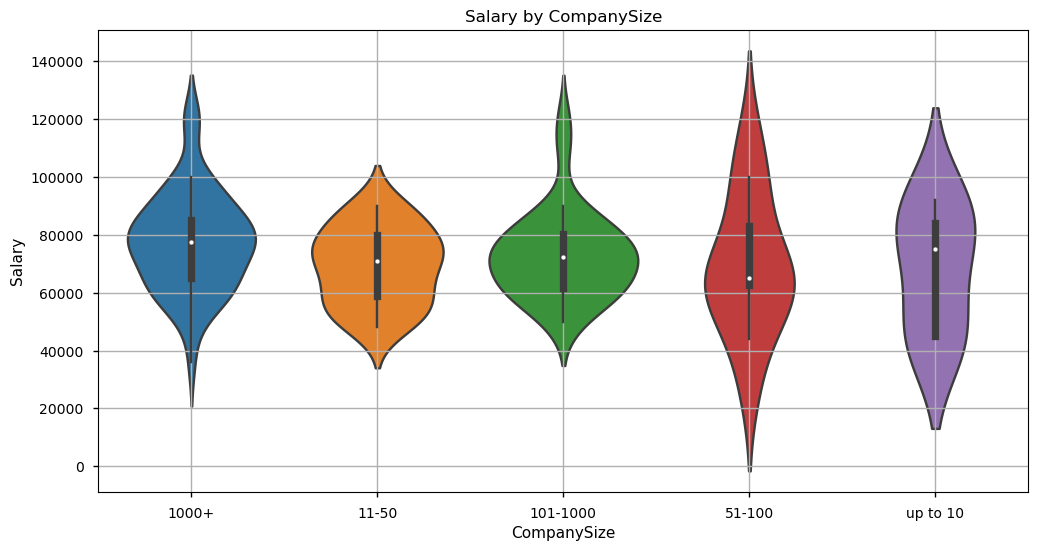

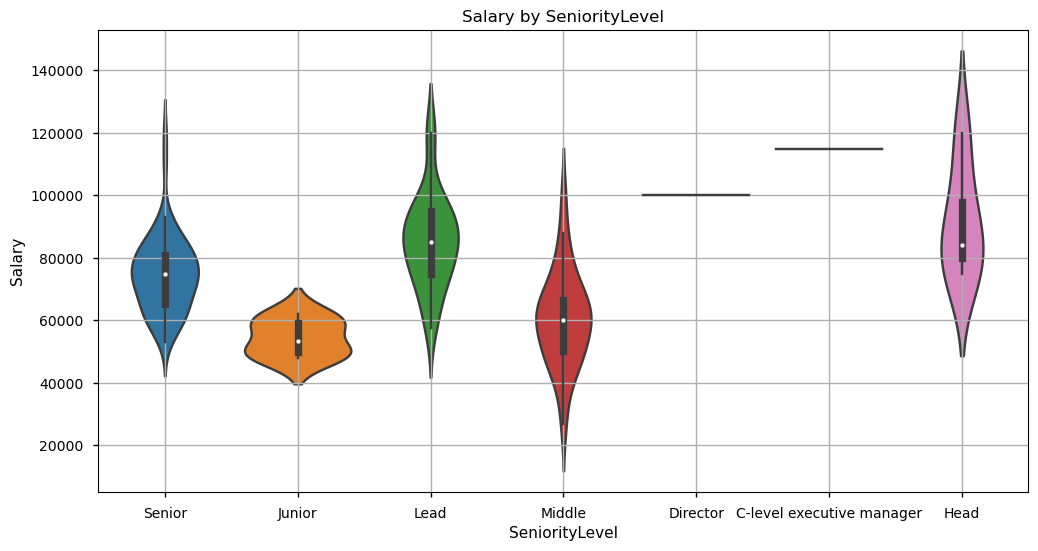

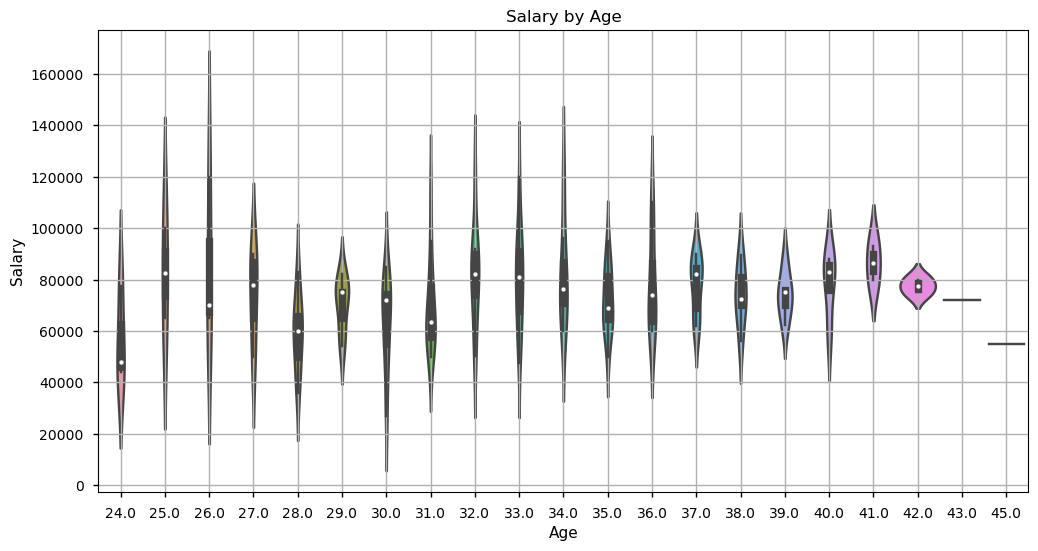

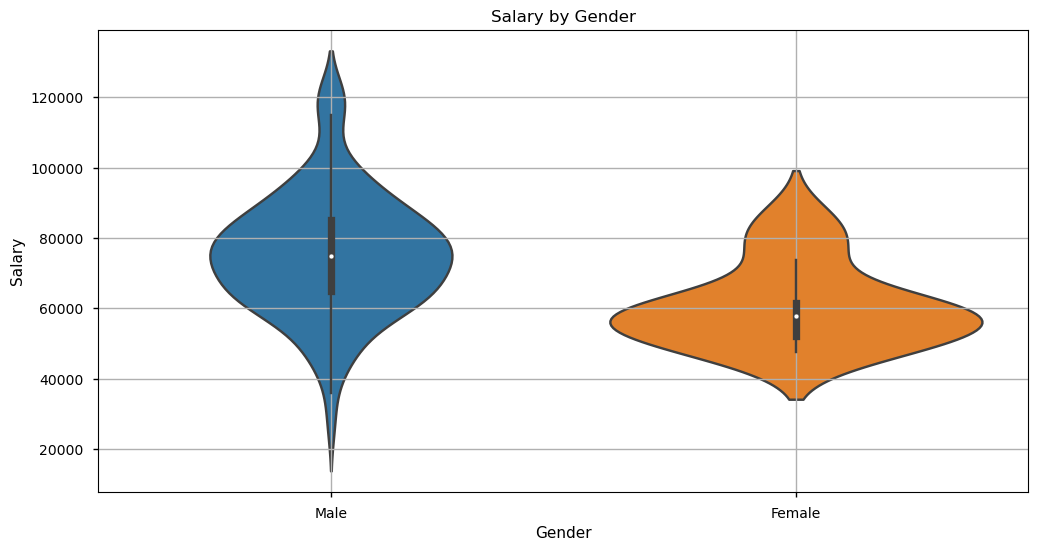

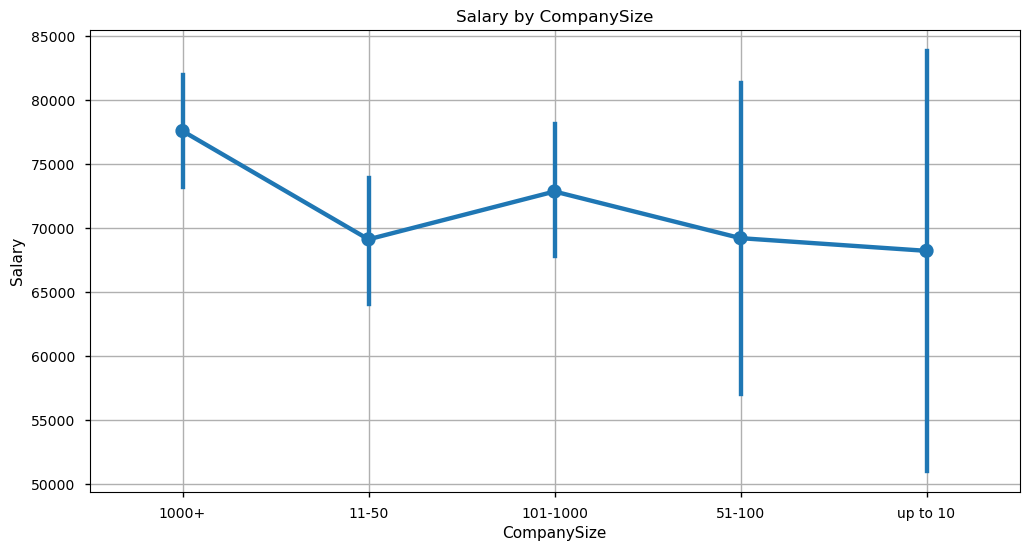

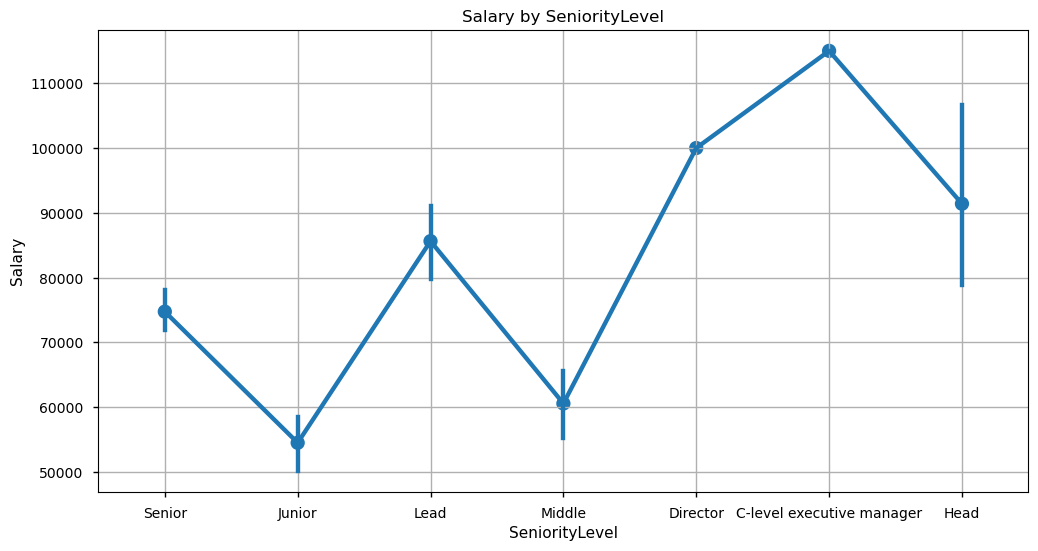

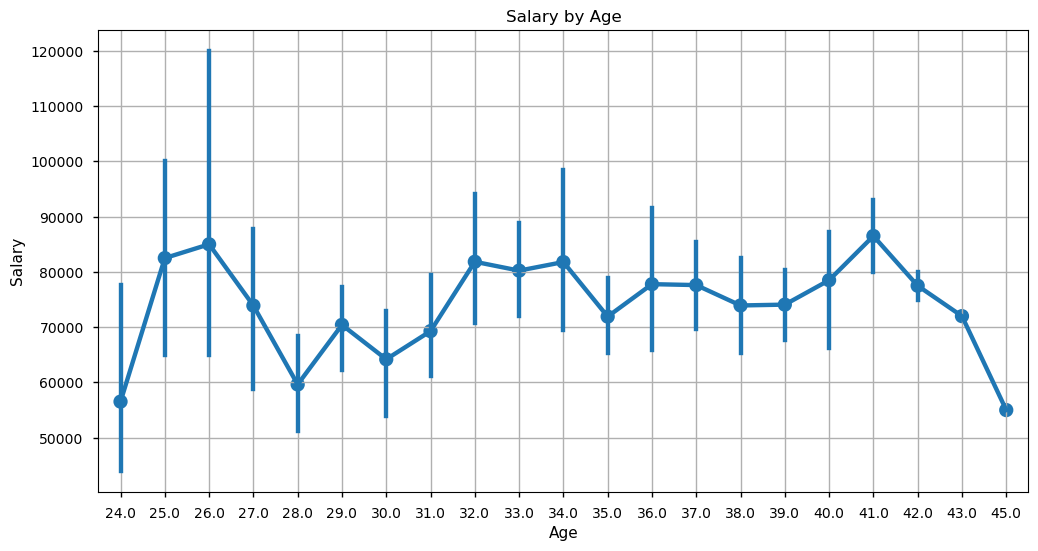

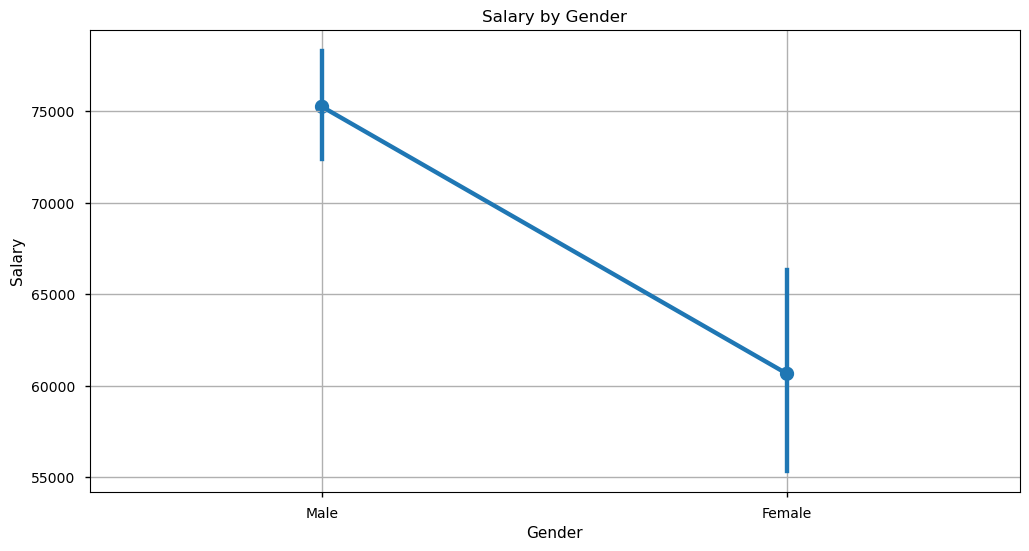

In [181]:
dfSalaryAndFeatures = df.copy(deep=True)
# correlation graphs for numerical data
dfSalaryAndFeatures.dropna(axis=0, inplace=True)

# remove outliers for every numerical column
for column in dfSalaryAndFeatures.select_dtypes(include='number').columns:
    Q1 = dfSalaryAndFeatures[column].quantile(0.25)
    Q3 = dfSalaryAndFeatures[column].quantile(0.75)
    IQR = Q3 - Q1
    dfSalaryAndFeatures= dfSalaryAndFeatures[~((dfSalaryAndFeatures[column] < (Q1 - 1.5 * IQR)) |(dfSalaryAndFeatures[column] > (Q3 + 1.5 * IQR)))]

# create correlation violin plots
my_features = ['CompanySize', 'SeniorityLevel', 'Age', 'Gender']

for f in my_features:
    plt.style.use('seaborn-notebook')
    plt.figure(figsize=(12,6))
    sns.violinplot(data=dfSalaryAndFeatures, x=f, y='Salary')
    plt.grid()
    plt.title('Salary by ' + f)

# create point plots for categorical data

for f in my_features:
    plt.style.use('seaborn-notebook')
    plt.figure(figsize=(12,6))
    sns.pointplot(data=dfSalaryAndFeatures, x=f, y='Salary')
    plt.grid()
    plt.title('Salary by ' + f)

# Graphs commented out because of computational time
# uncomment to see graphs with shift + alt + a

## zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty.

In [182]:
dfremoval = df.copy()
dfremoval.dropna(axis=0, inplace=True) # drop rows with NaN values
''' dfremoval.dropna(axis=1, inplace=True) # drop columns with NaN values '''
# remove outliers for every column
counter = 0
for column in dfremoval.columns:
    if dfremoval[column].dtype != 'object':
        Q1 = dfremoval[column].quantile(0.25)
        Q3 = dfremoval[column].quantile(0.75)
        IQR = Q3 - Q1
        dfremoval = dfremoval[~((dfremoval[column] < (Q1 - 1.5 * IQR)) |(dfremoval[column] > (Q3 + 1.5 * IQR)))]
        counter = counter + df[~((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))].shape[0]
print(dfremoval.shape)

print(dfremoval.isnull().sum().sum())
print('Dataframe contained %d rows containing outliers' %(df.shape[0] - dfremoval.shape[0]) )
print('Dataframe contained %d outliers' %(counter) )
dfremoval.head(5)


(131, 23)
0
Dataframe contained 1122 rows containing outliers
Dataframe contained 4875 outliers


,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
141,24/11/2020 12:09:03,34.0,Male,Munich,Cloud Architect,10,4,Senior,"Azure, SAP","SAP / ABAP, AWS, Google Cloud, Azure, Kubernet...",120000.0,40000,70000.0,30000,30,Full-time employee,Unlimited contract,English,1000+,Cloud,No,0.0,1000
221,24/11/2020 13:33:08,32.0,Male,Stuttgart,QA Engineer,9,9,Senior,Java,"R, SQL, Perl, Docker",60000.0,4700,67000.0,5000,30,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency,No,40.0,50
225,24/11/2020 13:37:57,24.0,Male,Boeblingen,C/C++/Java developer,0.8,0.8,Junior,Java,C/C++,48000.0,101,48000.0,101,30,Full-time employee,Unlimited contract,English,11-50,Product,No,40.0,250
276,24/11/2020 14:58:11,38.0,Male,Munich,Backend Developer,12,12,Senior,Java,"PHP, Javascript / Typescript, SQL",70000.0,1500,68000.0,1500,30,Full-time employee,Unlimited contract,German,101-1000,Telecommunications,No,0.0,675
289,24/11/2020 15:22:10,32.0,Male,Berlin,Software Engineer,9,5,Lead,JavaScript,"Javascript / Typescript, Ruby, AWS, Kubernetes...",90000.0,0,75000.0,0,25,Full-time employee,Unlimited contract,English,101-1000,Product,Have been a freelancer at the beginning of year,0.0,No


## proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).

In [183]:
# list columns with most NaN values
df.isnull().sum().sort_values(ascending=False)

ShortWeekHours                                            880
CovidSupport                                              791
StocksYearAgoSameCountry                                  639
Yearly bonus + stocks in EUR                              424
SalaryYearAgo                                             368
Other technologies/programming languages you use often    157
Your main technology / programming language               127
VacationDays                                               68
ExpierenceYearsGermany                                     32
Сontract duration                                          29
Age                                                        27
CompanyType                                                25
LostJobDueToCorona                                         20
CompanySize                                                18
Employment status                                          17
ExpierenceYears                                            16
Main lan

### Pocet objektu s vice chybejicimi hodnotami

11.49241819632881 % of the rows have no NaN values
76.13727055067837 % of the rows have more than 1 NaN values


Text(0.5, 1.0, 'Number of NaN values with growing number of NaN values in a row')

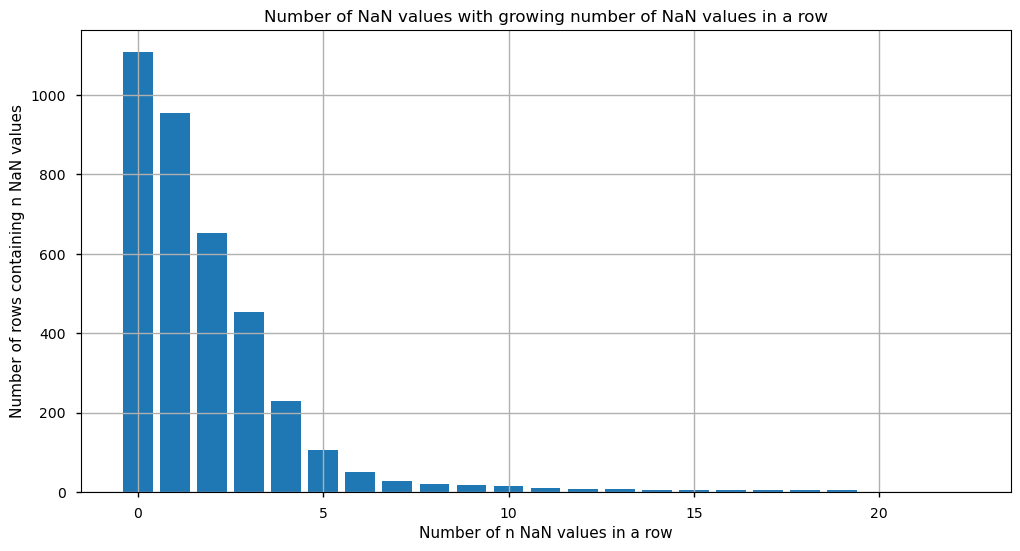

In [184]:
# list rows with more than one NaN values
print(df[df.isnull().sum(axis=1) < 1].any(axis=1).count() / len(df)*100, '% of the rows have no NaN values')
print(df[df.isnull().sum(axis=1) > 1].any(axis=1).count() / len(df)*100, '% of the rows have more than 1 NaN values')
df[df.isnull().sum(axis=1) > 1].head(5)

#
i= 0
columnList = []
for i in range (0, len(df.columns)):
    columnList.append(df[df.isnull().sum(axis=1) > i].any(axis=1).count())
    i = i+1

columnList

# create bar chart for NaN values of columnList
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))
plt.bar(range(0, len(df.columns)), columnList)
plt.xlabel('Number of n NaN values in a row')
plt.ylabel('Number of rows containing n NaN values')
plt.grid()
plt.title('Number of NaN values with growing number of NaN values in a row')

In [185]:
def is_number_in_std_of_df_length(df, number):
    return number > df.shape[0] - 3 * df.shape[0] / 4 and number < df.shape[0] + 3 * df.shape[0] / 4

def is_number_in_std_of_df_len(df, number):
    return (number > df.mean() - 3 * df.std()) and (number < df.mean() + 3 * df.std())    
# list rows with more than ten NaN values

print(df[df.isnull().sum(axis=1) > 10].any(axis=1).count() / len(df)*100, '% of the rows have more than 10 NaN values')
print('is value in standard deviations ?', is_number_in_std_of_df_length(df,df[df.isnull().sum(axis=1) > 10].any(axis=1).count()))
df[df.isnull().sum(axis=1) > 10]


1.1971268954509178 % of the rows have more than 10 NaN values
is value in standard deviations ? False


,Timestamp,Age,Gender,City,Position,ExpierenceYears,ExpierenceYearsGermany,SeniorityLevel,Your main technology / programming language,Other technologies/programming languages you use often,Salary,Yearly bonus + stocks in EUR,SalaryYearAgo,StocksYearAgoSameCountry,VacationDays,Employment status,Сontract duration,Main language at work,CompanySize,CompanyType,LostJobDueToCorona,ShortWeekHours,CovidSupport
55,24/11/2020 11:33:08,NaN,Male,Berlin,Software Engineer,NaN,1,Senior,PHP,NaN,7.500000e+04,NaN,NaN,NaN,NaN,Full-time employee,NaN,English,NaN,NaN,No,0.0,NaN
281,24/11/2020 15:07:35,28.0,Male,Berlin,Frontend Developer,8,5,Senior,Javascript,NaN,6.800000e+04,NaN,NaN,NaN,NaN,Full-time employee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,24/11/2020 18:16:39,25.0,Male,Berlin,Backend Developer,5,0,Senior,Java,Python,6.000000e+04,5600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,24/11/2020 18:50:50,30.0,Male,Samara,Backend Developer,2,0,Middle,php,"PHP, Javascript / Typescript, SQL",1.200000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,25/11/2020 03:27:34,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,25/11/2020 10:58:13,NaN,Male,Berlin,Software Engineer,15,NaN,Senior,Java,NaN,1.500000e+05,150000,NaN,NaN,NaN,Full-time employee,NaN,English,NaN,NaN,No,NaN,NaN
678,25/11/2020 19:02:20,21.0,Female,Cologne,Mobile Developer,2,2,Middle,NaN,NaN,5.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,25/11/2020 21:10:17,37.0,Male,Stuttgart,Backend Developer,NaN,NaN,Senior,C#,NaN,7.000000e+04,NaN,NaN,NaN,30,Full-time employee,Unlimited contract,NaN,NaN,NaN,No,NaN,NaN
714,25/11/2020 23:20:02,32.0,Male,Paris,DevOps,12,3,Senior,NaN,NaN,6.200000e+04,NaN,NaN,NaN,NaN,Full-time employee,NaN,English,1000+,NaN,NaN,NaN,NaN
770,26/11/2020 14:37:05,27.0,Male,Bucharest,QA Engineer,1,0,Junior,Javascript,Javascript / Typescript,1.100000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
#rows with NaN values that are greater than 1
counter = 0
for i in range(len(df.index)) :
    if df.iloc[i].isnull().sum() > 1 :
        counter += 1
counter

954

In [187]:
#pocet vsech NaN hodnot
df.isnull().sum().sum()

3682

## proveďte korelační analýzu numerických atributů (k analýze využijte i grafy a korelační koeficienty).

In [188]:
# correlation matrix of numerical data from dataframe
df.corr(method='spearman')

,Age,Salary,SalaryYearAgo,ShortWeekHours
Age,1.000000,0.331578,0.347417,0.016111
Salary,0.331578,1.000000,0.920552,-0.077135
SalaryYearAgo,0.347417,0.920552,1.000000,0.006897
ShortWeekHours,0.016111,-0.077135,0.006897,1.000000


In [189]:
df.corr(method='kendall')

,Age,Salary,SalaryYearAgo,ShortWeekHours
Age,1.000000,0.236848,0.247825,0.012667
Salary,0.236848,1.000000,0.789083,-0.058908
SalaryYearAgo,0.247825,0.789083,1.000000,0.007424
ShortWeekHours,0.012667,-0.058908,0.007424,1.000000


In [190]:
df.corr(method='pearson')

,Age,Salary,SalaryYearAgo,ShortWeekHours
Age,1.000000,-0.017259,-0.024847,-0.003563
Salary,-0.017259,1.000000,0.999998,-0.044144
SalaryYearAgo,-0.024847,0.999998,1.000000,-0.050298
ShortWeekHours,-0.003563,-0.044144,-0.050298,1.000000


Text(0.5, 1.0, 'Correlation HeatMap')

<Figure size 1000x1000 with 0 Axes>

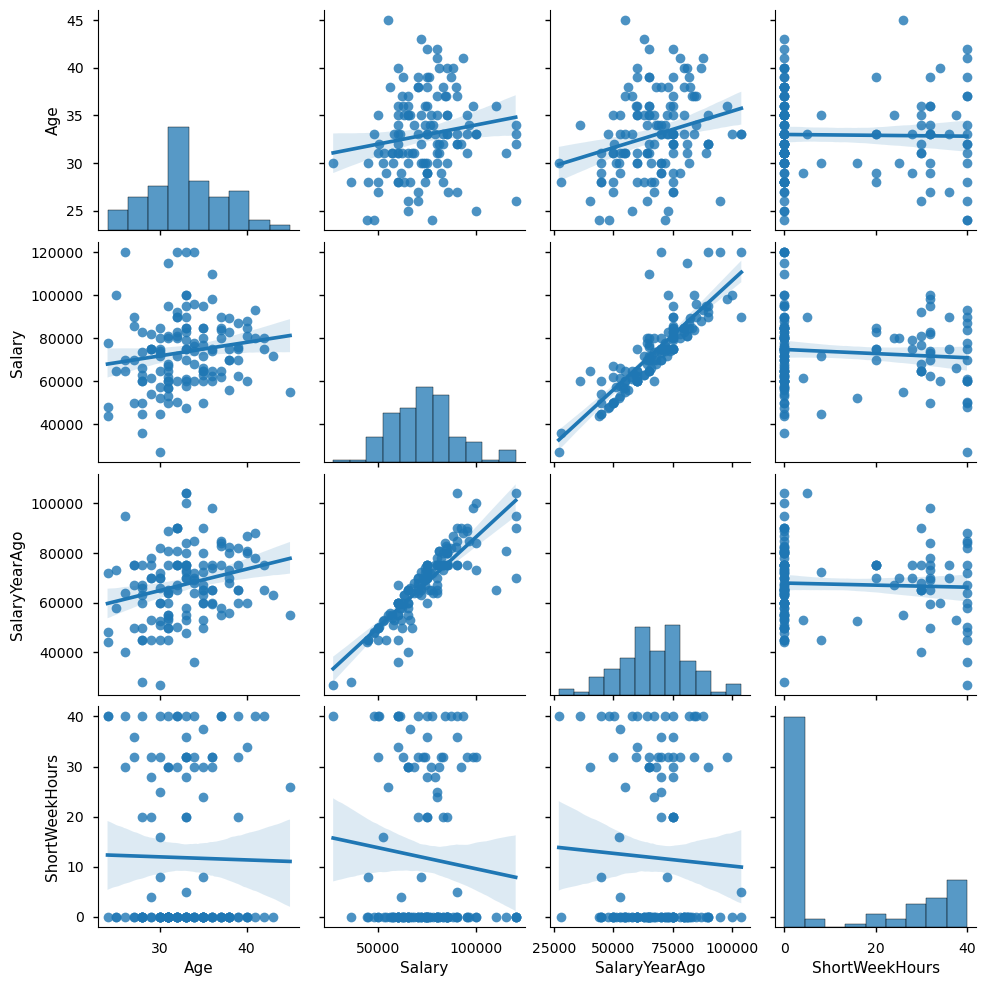

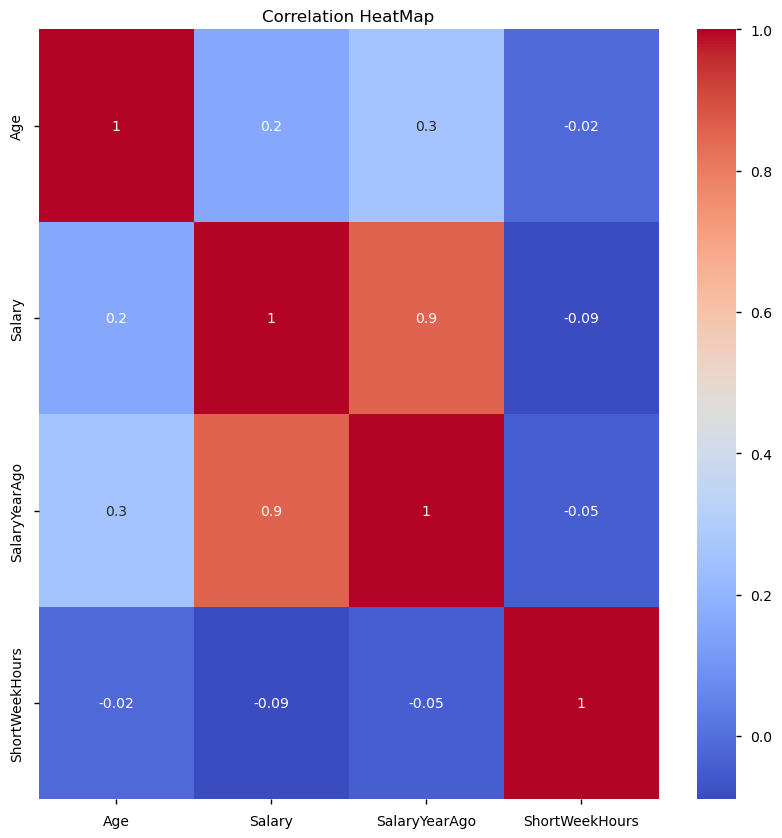

In [191]:
dfCorrelation = df.copy(deep=True)
# correlation graphs for numerical data
dfCorrelation.dropna(axis=0, inplace=True)

# remove outliers for every numerical column
for column in dfCorrelation.select_dtypes(include='number').columns:
    Q1 = dfCorrelation[column].quantile(0.25)
    Q3 = dfCorrelation[column].quantile(0.75)
    IQR = Q3 - Q1
    dfCorrelation = dfCorrelation[~((dfCorrelation[column] < (Q1 - 1.5 * IQR)) |(dfCorrelation[column] > (Q3 + 1.5 * IQR)))]

 # dfCorrelation['ExpierenceYears'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.pairplot(dfCorrelation, kind="reg")

# create heatmap for correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(dfCorrelation.corr(), annot=True, fmt='.1g', cmap='coolwarm')
plt.title('Correlation HeatMap')